# 📊 **Project2 - EDA**

# **EDA Backgroung and Motivation**
The purpose of this work is to analyze a specific aspect of the behavior of the Israeli politician in connection with deleting public individuals' responses to his/her  posts on social networks.


# **About The Data**
The data was collected by an Anonymous Activist and kept in JSON format. The data  consists of 2664 records, each relates a deleted response to a post released by an Israeli politician made on facebook pages.

The data was provided to us by Sharon Haleva Amir PhD. from the School of Communication at Bar Ilan University.

The data is not developed enough to make findings about personal specific politician behavior so we are enfoeced to analyze the behavior by grouping the politicians into groups (e.g. by political wing)

The EDA's dataset brings some inherent limitations (short duration, relatively small dataset). As the data research is the point of this EDA, the limitations are ignored during the EDA process (i.e. dataset size is about 2500 records which were acquired during a short time interval).

# **1 - Technical Enviroment**

## **1.1 - Import Packages & Modules**

In [ ]:
# Imports here

import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
from google.colab import files
%matplotlib inline

# **2 - Data Loading, Organizing, Acquiring and Cleaning**

**Overview of this section:**
* Load JSON file to DataFrame
* Acquire Data from Facebook via Web Scraping with Selenium
* Aggregate the new data and create a secondary DataFrame (**'likes_followers_df'**)
* Clean the data


## **2.1 - Data Loading**

### **2.1.1 - Mount Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **2.1.2 - Load JSON file to DataFrame**

In [ ]:
path = '/content/drive/My Drive/Project2_EDA/data/final_json_MKsDeletion.json'
df = pd.read_json(path) # Reading the data to df

### **2.1.3 - Initial Data overview**


In [ ]:
# View the data
df.head()

,-L5cV4-aWdhg6vgVnXQW,-L5cVbAhayPbPS4uffxM,-L5cVvD62wJd7FGh531G,-L5cWDQOBfR1z4QAsshj,-L5cWLeMCNu_k2PPndaF,-L5cWSIKPUI3mX-_Sc8r,-L5cWvKs3eYAd6JIcGeq,-L5cX0k90gZGKb0rP-3q,-L5cXA7BEejZnaY37B9O,-L5cXDRh6HCj3_21pVv9,-L5cXI-pNzsdV4nK6w7J,-L5cXa-UaLONQGAoGnze,-L5cY2AeUxFnl-3p68h1,-L5cYLg4qgHbOhEhmdMy,-L5cYXkdlefa2iHskiya,-L5cYaLXDy4hQw8M8sZA,-L5cYmFyxGMbobHbLUbR,-L5cZ0gaUFpozc0mPfyX,-L5cZI0ujGqGH-FkwPfh,-L5cZWVEB5ksaifsKjj9,-L5cbc7vCXtpieBNq5r5,-L5cbgzqcQX6691tlbb4,-L5cbjcd7-yHZUpR8HaN,-L5cbmDBf826syUOBpjy,-L5cbpUZ-sbgi3lLEYg7,-L5cbsJpmsKf3HY_ymH3,-L5cbyq2VbjTkg-L1zYG,-L5cc8O3s6MLteJ3Om4U,-L5ccDOK6-U-Z7PZleUv,-L5ccG15TfylZQJE_BG5,-L5ccS59Rho7tiHv_wUQ,-L5ccbWFIhaeiH65LFmX,-L5ccxLdE-mCkpPKkvXG,-L5cd-mMamK9D-7VuraT,-L5cd6GemBKKHHdopWmT,-L5cdBcAEC4x-zwI1E-n,-L5cdEwfJHq1jKTAF38v,-L5cdIp3rlRwu4iEwBat,-L5cdKtt6UyhBe0PcdcN,-L5cdNPr-FYlYX4Be4ND,...,-LB7EEUsGfZMtYZ96nJ2,-LBFkWUEMs8aKQxQih1g,-LBFkp8qv_uQ7eTCge3-,-LBGvNq0Wdu56XoTKSC4,-LBGvPR1paBJYzfF6-Mh,-LBGvTYHf4eMckTHP79b,-LBGviaT17C--wY4au5q,-LBLAZklDEPC98HqxZHr,-LBLA_rcx4zwx948JOft,-LBLAc8qn0YLIR4eECge,-LBLAdadagkGXzMCqB7N,-LBLAfEMbCBKErHEjaU8,-LBLAgiYuvdH-gedPHye,-LBLAi9odQVMWKvZ1LOs,-LBLBn6JfILZfeIOlAon,-LBLBp-n3Om0OqzcDMJN,-LBLBq9eLrU7bxxYX-Fp,-LBLByfuNne315_LeBWv,-LBLC-RNsIuVuC_s5QMA,-LBLC0ymrfxjvbg0c5MJ,-LBLC27G1g6Ulpo4UALl,-LBLC5gDnq1FiW5f2fDl,-LBLC8-9stYRXVtfL6fi,-LBLC9KFIdLcbBCbLiIA,-LBMuTzg1SBoFIvRNyqL,-LBMuVWd0vOdFB_DnKbT,-LBMuXOv0LWn_Z600EAl,-LBMuYlPc84rtgJg3qGd,-LBMu_3Oh97eW7tHbMfm,-LBMubELzy_m_PPONVmu,-LBMugKsjgLNuj3H5c6a,-LBMuhtrxQvncC5E1cVw,-LBMujBUMoh7HjNfnA-a,-LBMupGuIIp3OWXBHPAX,-LBMuqRhBPoRhnV_rA3c,-LBMutxhFjm-6pRxDgVE,-LBMuvZq8bk47ZlzpQcb,-LBMuz3sXD5HDOhCNoHC,-LBMv1_G6vehji_-EDn7,-LBMv49sZ8TawHUAw-Io
created_at,2018-02-13T13:43:14 0000,2018-02-12T18:55:00 0000,2018-02-13T19:00:51 0000,2018-02-12T19:23:01 0000,2018-02-13T21:51:32 0000,2018-02-13T22:02:46 0000,2018-02-13T22:42:47 0000,2018-02-13T21:51:29 0000,2018-02-14T04:31:49 0000,2018-02-14T13:07:57 0000,2018-02-14T13:12:12 0000,2018-02-14T14:07:00 0000,2018-02-15T19:43:21 0000,2018-02-13T22:14:07 0000,2018-02-13T15:49:49 0000,2018-02-13T17:11:43 0000,2018-02-13T18:29:55 0000,2018-02-15T16:34:10 0000,2018-02-12T18:44:13 0000,2018-02-11T12:18:04 0000,2018-02-11T15:27:55 0000,2018-02-13T21:06:47 0000,2018-02-13T21:07:54 0000,2018-02-13T21:11:14 0000,2018-02-13T21:18:15 0000,2018-02-13T21:06:09 0000,2018-02-14T09:45:24 0000,2018-02-15T19:19:02 0000,2018-02-12T00:48:13 0000,2018-02-11T16:23:17 0000,2018-02-17T06:02:11 0000,2018-02-13T23:11:09 0000,2018-02-11T21:10:04 0000,2018-02-11T20:42:37 0000,2018-02-12T16:27:46 0000,2018-02-12T16:59:12 0000,2018-02-12T22:01:51 0000,2018-02-13T06:21:36 0000,2018-02-12T17:20:56 0000,2018-02-13T18:18:06 0000,...,2018-04-26T19:06:53 0000,2018-04-29T09:23:56 0000,2018-04-27T18:13:13 0000,2018-04-29T09:40:17 0000,2018-04-29T13:52:15 0000,2018-04-29T12:37:07 0000,2018-04-29T12:13:34 0000,2018-04-29T19:26:17 0000,2018-04-30T07:15:37 0000,2018-04-30T07:02:12 0000,2018-04-30T07:13:21 0000,2018-04-30T07:37:17 0000,2018-04-30T07:59:28 0000,2018-04-30T08:10:57 0000,2018-04-29T20:11:37 0000,2018-04-30T08:31:41 0000,2018-04-30T10:15:08 0000,2018-04-29T17:35:50 0000,2018-04-30T08:33:49 0000,2018-04-28T21:30:03 0000,2018-04-29T03:53:23 0000,2018-04-30T05:27:10 0000,2018-04-29T09:33:39 0000,2018-04-30T08:45:11 0000,2018-04-30T11:22:10 0000,2018-04-30T17:56:59 0000,2018-04-30T13:00:20 0000,2018-04-30T13:27:16 0000,2018-04-30T14:21:12 0000,2018-04-30T15:16:49 0000,2018-04-30T12:46:26 0000,2018-04-30T11:38:30 0000,2018-04-30T12:55:59 0000,2018-04-30T15:49:43 0000,2018-04-30T15:50:24 0000,2018-04-30T15:22:50 0000,2018-04-30T12:16:03 0000,2018-04-30T14:45:06 0000,2018-04-30T17:58:08 0000,2018-04-30T09:52:22 0000
deletedAt,Tue Feb 13 2018 14:15:37 GMT 0000 (UTC),undefined,Tue Feb 13 2018 19:02:26 GMT 0000 (UTC),undefined,Tue Feb 13 2018 21:53:30 GMT 0000 (UTC),Tue Feb 13 2018 22:15:46 GMT 0000 (UTC),Wed Feb 14 2018 01:07:29 GMT 0000 (UTC),Wed Feb 14 2018 02:46:36 GMT 0000 (UTC),Wed Feb 14 2018 04:55:39 GMT 0

## **2.2 - Preliminary Data Organizing**

### **2.2.1 - Transpose the Data Matrix**

In [ ]:
df = df.transpose()
df.reset_index(inplace=True, drop=True)

In [ ]:
# DEBUG - View the data
df.head()

,created_at,deletedAt,id,message,page_id,enteredToWebsiteAt
0,2018-02-13T13:43:14 0000,Tue Feb 13 2018 14:15:37 GMT 0000 (UTC),1972265946121334_1972449156103013,רואים איך היא בלחץ גם מפלגת כולנו בדרך ...,1000293466651925,NaN
1,2018-02-12T18:55:00 0000,undefined,1754202071304803_1754231807968496,רק אותי הוא מצחיק?? דמגוג ופופוליסט בשנקל...וה...,107836625941364,NaN
2,2018-02-13T19:00:51 0000,Tue Feb 13 2018 19:02:26 GMT 0000 (UTC),1972265946121334_1972752722739323,מה שיפה שדאגו לעצמם לעלייה של 5000 שקל בחודש 6...,1000293466651925,NaN
3,2018-02-12T19:23:01 0000,undefined,1754202071304803_1754251124633231,"יהיר עלוב נפש , אתה בדיחה עלובה ופאטתית , בינך...",107836625941364,NaN
4,2018-02-13T21:51:32 0000,Tue Feb 13 2018 21:53:30 GMT 0000 (UTC),1755393887852288_1755402704518073,"מעולם לא תמכתי בביבי, זו האמת! וידוי נוסף- הצב...",107836625941364,NaN


### **2.2.2 - Convert ['created_at', 'deletedAt'] columns to DateTime, and describe time data**

In [ ]:
# find NaN
print(df['created_at'][df['created_at'] == 'undefined'].count())
print(df['deletedAt'][df['deletedAt'] == 'undefined'].count())

0
54


In [ ]:
# conversion to data-time
df['created_at'] = pd.to_datetime(df['created_at'], format='%Y-%m-%dT%H:%M:%S 0000')
df['deletedAt'] = df['deletedAt'].apply(lambda x: np.nan if x=='undefined' else datetime.strptime(x, '%a %b %d %Y %H:%M:%S GMT 0000 (UTC)'))

In [ ]:
# overview
df.describe(datetime_is_numeric=True)

,created_at,deletedAt
count,2664,2610
mean,2018-03-21 12:30:38.565317632,2018-03-22 18:04:09.704599808
min,2017-07-24 08:11:28,2018-02-13 12:04:31
25%,2018-03-04 11:23:00.750000128,2018-03-05 05:01:20
50%,2018-03-21 16:51:39.500000,2018-03-22 08:52:10
75%,2018-04-09 17:45:48.249999872,2018-04-10 04:24:50.750000128
max,2018-04-30 17:58:08,2018-04-30 18:04:45


#### **2.2.2.1 - Describe msg behavior over time for data points**

In [ ]:
# make Data Frame for the number of deletion \ creation of comments per week of year
df_week_of_year= df.deletedAt.dt.isocalendar().groupby('week').day.count().to_frame()
df_week_of_year.rename(columns={'day':'deleted_msg_that_week'}, inplace=True)
df_week_of_year['created_msg_that_week'] = df.created_at.dt.isocalendar().groupby('week').day.count()

In [ ]:
# DEBUG
df_week_of_year

,deleted_msg_that_week,created_msg_that_week
week,,
7,168,200
8,253,250
9,230,232
10,276,280
11,231,230
12,279,287
13,246,245
14,248,244
15,172,174


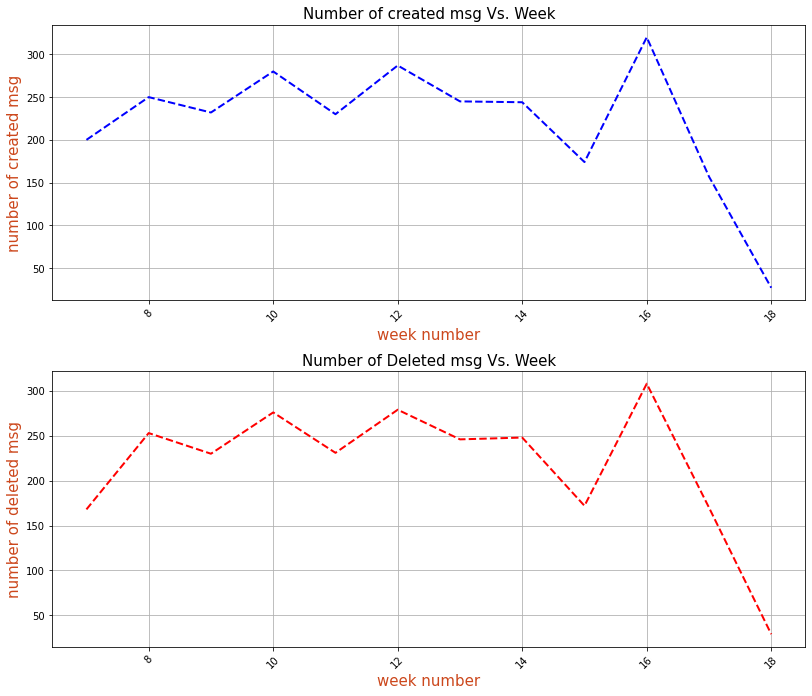

In [ ]:
# Visualize and describe time behavior for data points

fig = plt.figure(figsize=(22,14))

ax = fig.add_subplot(3, 2, 3)
plt.plot(df_week_of_year.index, df_week_of_year.deleted_msg_that_week, 'r--', linewidth=2, markersize=12)
plt.xlabel("week number", fontsize=15, color='#CC481D')
plt.xticks(rotation=45)
plt.ylabel("number of deleted msg", fontsize=15, color='#CC481D')
plt.title("Number of Deleted msg Vs. Week", fontsize=15)
plt.tight_layout()
plt.grid(True)

ax2 = fig.add_subplot(3, 2, 1)
plt.plot(df_week_of_year.index, df_week_of_year.created_msg_that_week, 'b--', linewidth=2, markersize=12)
plt.xlabel("week number", fontsize=15, color='#CC481D')
plt.xticks(rotation=45)
plt.ylabel("number of created msg", fontsize=15, color='#CC481D')
plt.title("Number of created msg Vs. Week", fontsize=15)
plt.tight_layout()
plt.grid(True)

plt.show()

### **2.2.3 - A quick overview**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2664 entries, 0 to 2663
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   created_at          2664 non-null   datetime64[ns]
 1   deletedAt           2610 non-null   datetime64[ns]
 2   id                  2664 non-null   object        
 3   message             2664 non-null   object        
 4   page_id             2664 non-null   object        
 5   enteredToWebsiteAt  2292 non-null   object        
dtypes: datetime64[ns](2), object(4)
memory usage: 125.0+ KB


In [ ]:
df.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,created_at,deletedAt,id,message,page_id,enteredToWebsiteAt
count,2664,2610,2664,2664,2664,2292
unique,2658,2107,2660,2657,79,2292
top,2018-03-21 16:46:07,2018-03-10 05:01:20,10156143083349438_10156144000499438,מאוד קל לנו.ציפציפ.. קשה לנו איתך עם המיליונים...,1544176299159896,Fri Mar 09 2018 20:46:21 GMT+0000 (UTC)
freq,2,11,2,2,293,1
first,2017-07-24 08:11:28,2018-02-13 12:04:31,NaN,NaN,NaN,NaN
last,2018-04-30 17:58:08,2018-04-30 18:04:45,NaN,NaN,NaN,NaN


### **2.2.4 - Look for NaN**

In [ ]:
# Find NaN
df.isna().sum()

created_at              0
deletedAt              54
id                      0
message                 0
page_id                 0
enteredToWebsiteAt    372
dtype: int64

## **2.3 - Acquire Politicians' Attributes from Facebook**

* **Scraping Facebook to get politicians names, page Likes and number of Followers**



> Due to General Data Protection Regulation (GDPR) we could not use facebook API to get politicians names from their page ids.

> We had to scrape facebook pages using BeautifulSoup.

> We have created a Dictionary with page_ids as keys and politicians names as values (**'page_id_name_convertion_dict'**).



In [ ]:
# # Imports here
# import requests
# from bs4 import BeautifulSoup

### **2.3.1 - Create a list of unique page ids**



In [ ]:
# # Extract unique page ids
# page_ids = df['page_id'].unique()
# page_ids

### **2.3.2 - Login into your personal Facebook account and save cookies**

In [ ]:
# def login(session, email, password):
#     '''
#     Attempt to login to Facebook. 
#     Returns cookies given to a user after they successfully log in.
#     '''
#     # Attempt to login to Facebook
#     response = session.post('https://m.facebook.com/login.php', data={
#         'email': email,
#         'pass': password
#     }, allow_redirects=False)

#     assert response.status_code == 302
#     assert 'c_user' in response.cookies
#     return response.cookies

### **2.3.3 - Grab Politicains' names from Facebook and create a dictionary**

* **FACEBOOK BLOCKS THIS CODE SO RUN IT ONCE FOR NEW DATA AND SAVE AS DICT** 

  * Create an empty dictionary ***('user')***
  * Loop over all page ids ***('page_ids')***
  * Concatenate page id to Facebook base URL
  * Parse HTML with BeautifulSoup ***('soup')***
  * Extract page title
  * Add 'page title' to dictionary ***('user')***

In [ ]:
# # MAKE SURE to replace USERNAME and PASSWORD with your own unique values
# USERNAME = 'your_facebook_username'
# PASSWORD = 'your_facebook_password!'

# # LOGIN to Facebook
# session = requests.session()
# cookies = login(session, USERNAME, PASSWORD)

# page_id_name_convertion_dict = dict()
# for page_id in page_ids:
#   PROTECTED_URL = f'https://www.facebook.com/{page_id}' 
#   time.sleep(10)
#   response = session.get(PROTECTED_URL, cookies=cookies,
#                           allow_redirects=True)
#   assert response.text.find('Home') != -1
#   ## PARSE HTML
#   soup = BeautifulSoup(response.text)
  
#   # Append politician name to dictionary - better practice 
#   page_id_name_convertion_dict[page_id] = soup.title.string

### **2.3.4 - The results Dictionary**

In [ ]:
page_id_name_convertion_dict = {'1000293466651925': 'מירב בן ארי - Merav Ben Ari',
                          '105820412921355': 'יואל חסון - Yoel Hasson',
                          '107836625941364': 'Yair Lapid - יאיר לפיד',
                          '118410851589072': 'Miri Regev מירי רגב',
                          '123439757700947': 'Tzipi Hotovely - ציפי חוטובלי',
                          '128834187134576': 'Ahmad Tibi احمد طيبي',
                          '1390871357875195': 'Zouheir Bahloul זוהיר בהלול زهير بهلول',
                          '142479632494944': 'גילה גמליאל - Gila Gamliel',
                          '1457440094475905': 'Stav Shaffir סתיו שפיר',
                          '1531002607150465': 'יפעת שאשא ביטון - Yifat Shasha Biton',
                          '1544176299159896': 'Moshe Kahlon - משה כחלון',
                          '154570404606299': 'עמיר פרץ Amir Peretz',
                          '156632191145120': 'עמר בר-לב - Omer Bar-lev',
                          '1570666663171112': 'יעל כהן פארן Yael Cohen Paran',
                          '1578176972413229': 'Yoav Kisch - יואב קיש',
                          '1616458521900335': 'Rachel Azaria - רחל עזריה',
                          '161648040544835': "יצחק (בוז'י) הרצוג - Isaac Herzog",
                          '1618820118331461': 'רועי פולקמן Roy Folkman',
                          '162319074217': 'shelly yehimovitz - שלי יחימוביץ',
                          '166156570202888': 'Issawi Frej - עיסאוי פריג',
                          '174411199282819': 'Eitan Cabel - איתן כבל',
                          '178433145502975': 'Avigdor Liberman - אביגדור ליברמן',
                          '207139259326193': 'גלעד ארדן | Gilad Erdan',
                          '212547315512949': 'רויטל סויד עו"ד | Revital Swid',
                          '213793465311034': 'Merav Michaeli  מרב מיכאלי',
                          '237683826350051': 'איילת שקד - Ayelet Shaked',
                          '268108602075': 'Benjamin Netanyahu - בנימין נתניהו',
                          '276394881722': 'אבי דיכטר - Avi Dichter',
                          '284775634985944': 'Tamar Zandberg תמר זנדברג',
                          '291524437542463': 'Deleted User 1',
                          '295104730523499': 'דב חנין Dov Khenin',
                          '297207456997968': 'Tzachi Hanegbi - צחי הנגבי',
                          '301325946716996': 'ד"ר ענת ברקו - Dr. Anat Berko',
                          '302282753147898': 'Ilan Gilon - אילן גלאון',
                          '310448006908': 'Ofir Akunis - אופיר אקוניס',
                          '335399036546914': 'ישראל כ״ץ - Israel Katz',
                          '341448679281672': 'יריב לוין - Yariv Levin',
                          '344177249102141': 'Eyal Ben-Reuven איל בן ראובן',
                          '344375515658579': 'זאב אלקין Zeev Elkin',
                          '364478330291286': 'מוטי יוגב - Moti Yogev',
                          '369855119713388': 'Mickey Levy - מיקי לוי',
                          '371855757456': 'Yuli Edelstein - יולי אדלשטיין',
                          '374282785980513': 'נורית קורן - Nurit Koren',
                          '37665519437': 'Tzipi Livni - ציפי לבני',
                          '386001744772337': 'Michal Biran | מיכל בירן',
                          '389464081230676': 'Deleted User 2',
                          '394242203948130': 'אורי אריאל - Uri Ariel',
                          '396697410351933': 'נפתלי בנט - Naftali Bennett',
                          '402936269773132': 'עליזה לביא Aliza Lavie',
                          '404314496289809': 'איציק שמולי | Itzik Shmuli',
                          '408265492578926': 'עפר שלח - Ofer Shelah',
                          '408819395854150': 'אלעזר שטרן Elazar stern',
                          '422665717788216': 'חיים כץ - Haim Katz',
                          '429184557235927': 'Bezalel Smotrich - בצלאל סמוטריץ',
                          '432953930099972': 'מאיר כהן - Meir Cohen',
                          '433095953410548': 'אריה מכלוף דרעי Arye Machlouf Dery',
                          '433529446712013': 'Ayman Odeh - أيمن عودة',
                          '438831352866459': 'Shuli Mualem - שולי מועלם',
                          '450583275090800': 'אלי כהן - Eli Cohen',
                          '455810997796182': 'יוסי יונה - Yossi Yonah - يوسي يونا',
                          '457794627605948': 'Karine Elharrar- קארין אלהרר',
                          '485996514776399': 'Eli Ben-Dahan אלי בן דהן',
                          '500681436740099': 'אורן חזן - Oren Hazan',
                          '503855396298871': 'יעל גרמן - Yael German',
                          '520086018021432': 'Mickey Rosenthal - מיקי רוזנטל',
                          '612784452070209': 'Deleted User 3',
                          '617957021581571': 'Michal Rozin מיכל רוזין ميخال روزين',
                          '620206311338749': 'Hilik Bar   חיליק בר',
                          '621641341315498': 'יואב גלנט - Yoav Gallant',
                          '623230457774334': 'יובל שטייניץ - Yuval Steinitz',
                          '625040900863570': 'ח"כ יוליה מלינובסקי - Yulia Malinovsky',
                          '632771873441351': 'מוסי רז Mossi Raz موسي راز',
                          '646669815433253': 'דוד אמסלם  David Amsalem',
                          '650655681612302': 'Sharren Haskel שרן השכל',
                          '678851148898054': 'Amir Ohana - אמיר אוחנה',
                          '709216422557802': "Jackie Levy ז'קי לוי",
                          '841259115934187': 'קסניה סבטלובה - Ksenia Svetlova',
                          '901327179955923': 'איילת נחמיאס ורבין - Ayelet Nahmias Verbin',
                          '977353718949028': 'מיקי זוהר-  Micki Zohar'}

### **2.3.5 - Add Politicians' Names & Political Wing to DataFrame**

#### **2.3.5.1 - Filter Politicians' English Names (using 'regex')**

In [ ]:
# CLEAN USER FOR DISPLAY

# for pol_name pattern
pattern = re.compile(r'([a-zA-Z.-]+\s+([a-zA-Z.-]*\s*)+[a-zA-Z.-]+|[sКсенияСветлова]+\s+[sКсенияСветлова]+)')

# Iterate over 'page_id_name_convertion_dict'
for k in page_id_name_convertion_dict.keys():
  match = pattern.search(page_id_name_convertion_dict[k])
  page_id_name_convertion_dict[k] = match.group(0).replace('-',' ').replace('.','').strip()

# # replace for better DISPLAY
# page_id_name_convertion_dict[next(key for key, value in page_id_name_convertion_dict.items() if value == 'Ilan Galon')] = 'Ilan Gilon'
# page_id_name_convertion_dict[next(key for key, value in page_id_name_convertion_dict.items() if value == 'Ксения Светлова')] = 'Ksenia Svetlova'
# page_id_name_convertion_dict[next(key for key, value in page_id_name_convertion_dict.items() if value == 'MK Yulia Malinovsky')] = 'Yulia Malinovsky'

page_id_name_convertion_dict

#### **2.3.5.2 - Add Politicians' Names to DataFrame**

In [ ]:
# GOOD PRACTICE
df['Politician'] = df['page_id'].map(page_id_name_convertion_dict)

#-----------------------------------------------------------
# BAD PRACTICE - DON'T USE iterrows
#create a new empty column
# df['name'] = ""
# # #iterate over dataframe 
# for index, row in df.iterrows():
#   row['name'] = page_id_name_convertion_dict[(row['page_id'])]
#-----------------------------------------------------------
df.head()

#### **2.3.5.3 - Remove 'Deleted Users' rows**

In [ ]:
# Delete all rows related to 'Deleted Users'

df.drop(df[df['Politician'].str.contains('Deleted', regex=False)].index, inplace = True)

In [ ]:
# DEBUG
df.shape

#### **2.3.5.4 - Assign Political Wing (Right/Left) to Politicians**

* We categorized the poiliticains to their political wing (RIGHT/LEFT) mostly based of their party association and their approach to the "TWO STATE SOLUTION"

In [ ]:
# Create Dictionary for Political Orientation - Done Manually.
political_orientation_dict = {'RIGHT_WING':['Miri Regev', 'Tzipi Hotovely', 'Gila Gamliel', 'Yifat Shasha Biton', 
                                            'Moshe Kahlon', 'Yoav Kisch', 'Rachel Azaria', 'Roy Folkman', 'Avigdor Liberman', 'Gilad Erdan',
                                            'Ayelet Shaked', 'Benjamin Netanyahu', 'Avi Dichter', 'Tzachi Hanegbi', 'Dr Anat Berko', 'Ofir Akunis', 
                                            'Israel Katz', 'Yariv Levin', 'Zeev Elkin', 'Moti Yogev', 'Yuli Edelstein', 'Nurit Koren', 'Uri Ariel',
                                            'Naftali Bennett', 'Haim Katz', 'Bezalel Smotrich', 'Arye Machlouf Dery', 'Shuli Mualem',
                                            'Eli Cohen', 'Eli Ben Dahan', 'Oren Hazan', 'Yoav Gallant', 'Yuval Steinitz', 'Yulia Malinovsky',
                                            'David Amsalem', 'Sharren Haskel', 'Amir Ohana', 'Jackie Levy', 'Micki Zohar'], 
                              'LEFT_WING':['Merav Ben Ari', 'Yoel Hasson', 'Yair Lapid', 'Ahmad Tibi', 'Zouheir Bahloul', 
                                           'Stav Shaffir', 'Amir Peretz', 'Omer Bar lev', 'Yael Cohen Paran', 'Isaac Herzog', 
                                           'shelly yehimovitz', 'Issawi Frej', 'Eitan Cabel', 'Revital Swid', 'Merav Michaeli',
                                           'Tamar Zandberg', 'Dov Khenin', 'Ilan Gilon', 'Eyal Ben Reuven', 'Mickey Levy', 'Tzipi Livni', 
                                           'Michal Biran', 'Aliza Lavie', 'Itzik Shmuli', 'Ofer Shelah', 'Elazar stern', 'Meir Cohen',
                                           'Ayman Odeh', 'Yossi Yonah','Karine Elharrar', 'Yael German', 'Mickey Rosenthal', 'Michal Rozin', 
                                           'Hilik Bar', 'Mossi Raz', 'Ksenia Svetlova', 'Ayelet Nahmias Verbin']}

In [ ]:
# Create separate Dictionaries for Right/Left Wing Politicians

# GOOD PRACTICE
left_politicians = {name:'LEFT_WING' for name in political_orientation_dict['LEFT_WING']}
right_politicians = {name:'RIGHT_WING' for name in political_orientation_dict['RIGHT_WING']}

# Join both dictionaries
all_politicians = {**left_politicians, **right_politicians}

# Print the joined dictionary
all_politicians

In [ ]:
# Add Political Orientation Column to DataFrame

df['Wing'] = df['Politician'].map(all_politicians)
df.sample(5)

In [ ]:
# Check if All politicians had political wing assignment

print(df['Wing'].isnull().values.any())
df[df['Wing'].isnull()]

### 🔻

In [ ]:
!pip install Requests-html

### **Scraping for party affiliation and orientation data**

We need to decide if we want to scrape Wikipedia (or other sources) to legitimize our classification decision as a “data-based decision” – or leave it as “for our best understanding”. Here I started to work on a concept to find a party name (true to the situation as they stood in 2018 – when the data was collected) and divide the politician to groups of parties. Next, I figured, we can rely upon popular party affiliation classifications (maybe from party page or pulls classification) to make broad sense. As it is much easier to justify the majority opinion on a party orientation – rather then a certain individual petition (a party tend to broadly associate itself towards left or right wing) 

Data was obtained from the wiki page for the 20th Knesset of Israel (2018 – which is the same timeframe for our data source) 

https://en.wikipedia.org/wiki/List_of_members_of_the_twentieth_Knesset 

In [ ]:
from requests_html import HTML, HTMLSession, HTMLResponse

**Requests-HTML-sessions Web Scaping**

In [ ]:
#1.
session = HTMLSession()
#2.
resp_HTML = session.get(f'https://en.wikipedia.org/wiki/List_of_members_of_the_twentieth_Knesset')
#3.
# all the information I want (pol_name + party names) is within the 'table' part of the html
table = resp_HTML.html.find('table.wikitable', first=True)

**Make two lists: 1.party names, 2.pol_name + party names.**

In [ ]:
party_lst = table.find('td[rowspan]')
party_or_mem_lst = table.find('td')

In [ ]:
# iter over table list
for tr in table.find('.wikitable tr'):
  print(tr.text)

In [ ]:
txt_table = table.text
txt_table

In [ ]:
lst_pol_and_party = table.text.split('\n')[2:]
lst_pol_and_party

In [ ]:
lst_just_party = []
for i in table.find('td[rowspan]'):
  lst_just_party.append(i.text)

lst_just_party

**Create a dictionary out of the two lists, using the number within the “()” as notation for slicing the data**

In [ ]:
pattern = re.compile(r'(\d+)')

table_dict = dict()
for i in lst_pol_and_party:
  if i in lst_just_party:
    table_dict[i] = lst_pol_and_party[next(j for j, 
                    e in enumerate(lst_pol_and_party) if e == i)+1:next(j for j, 
                    e in enumerate(lst_pol_and_party) if e == i)+int(re.search(pattern, i).group(0))+1]

table_dict

**Clean the dictionary (remove party name number)**

In [ ]:
pattern = re.compile(r'([a-zA-Z]+\s*[a-zA-Z]*\s*[a-zA-Z]*)')

keys_list = list(table_dict.keys())
new_keys_list = []

for i in range(len(keys_list)):
  j = re.search(pattern, keys_list[i]).group(0).strip(' ')
  new_keys_list.append(j)

table_dict_new = dict(zip(new_keys_list, list(table_dict.values()))) 
table_dict_new

In [ ]:
############################################## add patry column to df ##########################################

In [ ]:
# politicians = dict()
# # Create separate Dictionaries for per party Politicians
# for party, pol in table_dict_new.items():
#     politicians = {pol: party for pol in table_dict_new[party]}
#     all_politicians = {**politicians} # Join dictionaries
#     politicians.clear()

# # Print the joined dictionary
# all_politicians

### **2.3.6 - Grab Politicians Like & Followers (from Facebook using Selenium)**

Scrape politicains pages for number of Likes & Followers

!! Using code by MariyaSha !!

Check her GitHub:
https://github.com/MariyaSha/WebscrapingFacebook/blob/main/FB_Scraper.ipynb

#### **Download ChromeDriver**

We need to download latest stable release of ChromeDriver from: https://chromedriver.chromium.org/

**If you know where your ROOT folder is**

save it there and you won't need to specify a URL to this file at webdriver.Chrome()

**If you don't know where your ROOT folder is**

save it anywhere and secify the URL of the file inside webdriver.Chrome("my/URL")

#### **Import Selenium & time**

In [ ]:
# #imports here
# from selenium import webdriver
# from selenium.webdriver.common.keys import Keys
# from selenium.webdriver.support import expected_conditions as EC
# from selenium.webdriver.common.by import By
# from selenium.webdriver.support.wait import WebDriverWait
# import time

#### **2.3.6.1 - Disable Alerts/Notifications**
!! Using code by **pythonjar** of **Stackoverflow** !!
Please visit this thread for more details:
https://stackoverflow.com/questions/41400934/handle-notifications-in-python-selenium-chrome-webdriver

In [ ]:
# #code by pythonjar, not me
# chrome_options = webdriver.ChromeOptions()
# prefs = {"profile.default_content_setting_values.notifications" : 2}
# chrome_options.add_experimental_option("prefs",prefs)

#### **2.3.6.2 - Log into your personal Facebook account**
MAKE SURE to replace **my_username** and **my_password** with your own unique values

In [ ]:
# #specify the path to chromedriver.exe (download and save on your computer)
# driver = webdriver.Chrome('C:/Users/goaim/chromedriver.exe', chrome_options=chrome_options)

# #open the webpage
# driver.get("http://www.facebook.com")

# #target username
# username = WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.CSS_SELECTOR, "input[name='email']")))
# password = WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.CSS_SELECTOR, "input[name='pass']")))

# #enter username and password
# username.clear()
# username.send_keys("my_username")
# password.clear()
# password.send_keys("my_password")

# #target the login button and click it
# button = WebDriverWait(driver, 2).until(EC.element_to_be_clickable((By.CSS_SELECTOR, "button[type='submit']"))).click()

# #We are logged in!

#### **2.3.6.3 - Extract number of Page Likes and Followers**

* Create an empty dictionary **('politicians_dict')**
* Loop over all page ids **('page_ids_list')**
* Extract page LIKE, FOLLOWERS and politician name
* Store page info in dictionary **('politicians_dict')**

In [ ]:
# #wait 5 seconds to allow your new page to load
# time.sleep(5)

# # Create a list of unique page ids
# page_ids_list = list(df['page_id'].unique())

# # Create a dictionary to store page LIKES & FOLLOWERS by page id
# politicains_dict = {}

# # Base URL
# BASE_URL = 'http://www.facebook.com/'

# # itterate over all page ids
# for id in page_ids_list:
    
#     # concate page id to BASE URL
#     link = BASE_URL + str(id) + '/'
#     driver.get(link)
#     time.sleep(10)
#     # Extract page LIKES, FOLLOWERS and politician name and store in dictionary
#     try:
#         politician_name = driver.find_element_by_xpath("/html/body/div[1]/div/div[1]/div/div[3]/div/div/div[1]/div[1]/div[1]/div[2]/div/div/div/div[2]/div/div/div[1]/h2/span/span")
#         likes = driver.find_element_by_xpath('/html/body/div[1]/div/div[1]/div/div[3]/div/div/div[1]/div[1]/div[4]/div[2]/div/div[1]/div[2]/div[2]/div/div/div/div[2]/div[3]/div[1]/div/div/div[2]/div/div/span/span[1]')
#         followers = driver.find_element_by_xpath('/html/body/div[1]/div/div[1]/div/div[3]/div/div/div[1]/div[1]/div[4]/div[2]/div/div[1]/div[2]/div[2]/div/div/div/div[2]/div[4]/div/div/div/div[2]/div/div/span/span')
#         politicains_dict[id] = [politician_name.text, likes.text, followers.text] 
#     except:
#         try:
#             politician_name = driver.find_element_by_xpath("/html/body/div[1]/div/div[1]/div/div[3]/div/div/div[1]/div[1]/div/div/div[1]/div[2]/div/div/div[2]/div/div/div/div[1]/div/div/span/h1")
#             followers = driver.find_element_by_xpath('/html/body/div[1]/div/div[1]/div/div[3]/div/div/div[1]/div[1]/div/div/div[4]/div[2]/div/div[1]/div[2]/div/div[1]/div/div/div/div/div[2]/div/div/ul/div[1]/div[2]/div/div/span/a')
#             politicains_dict[id] = [politician_name.text, '', followers.text] 
#         except:
#             try:
#                 politician_name = driver.find_element_by_xpath('/html/body/div[1]/div/div[1]/div/div[3]/div/div/div[1]/div[1]/div[1]/div[2]/div/div/div/div[2]/div/div/div[1]/h2/span/span')
#                 likes = driver.find_element_by_xpath('/html/body/div[1]/div/div[1]/div/div[3]/div/div/div[1]/div[1]/div[4]/div[2]/div/div[1]/div[2]/div[1]/div/div/div/div[2]/div[3]/div[1]/div/div/div[2]/div/div/span/span[1]')
#                 followers = driver.find_element_by_xpath('/html/body/div[1]/div/div[1]/div/div[3]/div/div/div[1]/div[1]/div[4]/div[2]/div/div[1]/div[2]/div[1]/div/div/div/div[2]/div[4]/div/div/div/div[2]/div/div/span/span')
#                 politicains_dict[id] = [politician_name.text, likes.text, followers.text]
#             except:
#                 politicains_dict[id] = ["", "", ""]
#                 continue

#### **2.3.6.4 - The Results Dictionary**


In [ ]:
politicians_dict = {1000293466651925: ['מירב בן ארי - Merav Ben Ari', '25,448 people', '25,932 people follow this'],
                    107836625941364: ['Yair Lapid - יאיר לפיד', '504,969 people', '511,567 people follow this'],
                    123439757700947: ['', '', ''],
                    142479632494944: ['גילה גמליאל - Gila Gamliel', '50,145 people', '50,376 people follow this'],
                    1544176299159896: ['משה כחלון',  '188,240 people', '188,592 people follow this'],
                    154570404606299: ['', '', ''],
                    161648040544835: ['יצחק הרצוג - Isaac Herzog', '133,680 people', '131,717 people follow this'],
                    1618820118331461: ['', '', ''],
                    162319074217: ['', '', ''],
                    174411199282819: ['איתן כבל', '48,184 people', '47,810 people follow this'],
                    212547315512949: ['רויטל סויד עו"ד | Revital Swid', '26,374 people', '26,739 people follow this'],
                    268108602075: ['Benjamin Netanyahu - בנימין נתניהו', '2,622,328 people', '2,703,990 people follow this'],
                    276394881722: ['אבי דיכטר - Avi Dichter ', '', '97K Followers'],
                    284775634985944: ['Tamar Zandberg תמר זנדברג', '105,443 people', '107,097 people follow this'],
                    295104730523499: ['דב חנין Dov Khenin', '88,398 people', '89,078 people follow this'],
                    297207456997968: ['Tzachi Hanegbi - צחי הנגבי', '47,840 people', '48,022 people follow this'],
                    310448006908: ['Ofir Akunis - אופיר אקוניס', '71,495 people',  '72,018 people follow this'],
                    341448679281672: ['יריב לוין - Yariv Levin',  '71,249 people',  '73,292 people follow this'],
                    344375515658579: ['', '', ''],
                    369855119713388: ['Mickey Levy - מיקי לוי',  '26,836 people',  '28,118 people follow this'],
                    371855757456: ['Yuli Edelstein - יולי אדלשטיין ', '', '71K Followers'],
                    374282785980513: ['נורית קורן - Nurit Koren',  '12,033 people',  '12,294 people follow this'],
                    37665519437: ['Tzipi Livni - ציפי לבני',  '175,378 people',  '173,150 people follow this'],
                    386001744772337: ['Michal Biran | מיכל בירן',  '18,889 people',  '19,012 people follow this'],
                    394242203948130: ['אורי אריאל - Uri Ariel',  '20,231 people',  '20,306 people follow this'],
                    396697410351933: ['נפתלי בנט - Naftali Bennett',  '514,401 people',  '533,460 people follow this'],
                    402936269773132: ['', '', ''],
                    404314496289809: ['איציק שמולי | Itzik Shmuli',  '112,554 people',  '112,913 people follow this'],
                    422665717788216: ['חיים כץ - Haim Katz',  '50,298 people',  '50,326 people follow this'],
                    432953930099972: ['מאיר כהן - Meir Cohen',  '24,939 people',  '25,616 people follow this'],
                    450583275090800: ['אלי כהן - Eli Cohen',  '62,028 people',  '63,644 people follow this'],
                    500681436740099: ['', '', ''],
                    520086018021432: ['מיקי רוזנטל',  '40,455 people',  '41,168 people follow this'],
                    617957021581571: ['Michal Rozin מיכל רוזין ميخال روزين',  '40,491 people',  '41,105 people follow this'],
                    632771873441351: ['מוסי רז Mossi Raz موسي راز',  '27,233 people',  '27,965 people follow this'],
                    646669815433253: ['דוד אמסלם David Amsalem',  '109,384 people',  '121,866 people follow this'],
                    678851148898054: ['Amir Ohana - אמיר אוחנה',  '93,020 people',  '112,136 people follow this'],
                    977353718949028: ['מיקי זוהר- Micki Zohar',  '41,120 people',  '44,246 people follow this'],
                    118410851589072: ['', '', ''],
                    166156570202888: ["עיסאוי פריג'",  '21,117 people',  '21,227 people follow this'],
                    302282753147898: ['אילן גילאון ', '', '58K Followers'],
                    1531002607150465: ['יפעת שאשא ביטון - Yifat Shasha Biton',  '78,557 people',  '81,318 people follow this'],
                    503855396298871: ['', '', ''],
                    207139259326193: ['גלעד ארדן | Gilad Erdan',  '119,986 people',  '123,717 people follow this'],
                    650655681612302: ['', '', ''],
                    1570666663171112: ['יעל כהן פארן Yael Cohen Paran',  '28,284 people',  '28,644 people follow this'],
                    1578176972413229: ['', '', ''],
                    105820412921355: ['יואל חסון - Yoel Hasson ', '', '21K Followers'],
                    625040900863570: ['ח"כ יוליה מלינובסקי - MK Yulia Malinovsky',  '9,260 people',  '9,557 people follow this'],
                    156632191145120: ['עמר בר-לב - Omer Barlev',  '56,951 people',  '57,349 people follow this'],
                    213793465311034: ['Merav Michaeli מרב מיכאלי',  '167,221 people',  '185,339 people follow this'],
                    335399036546914: ['ישראל כ״ץ - Israel Katz',  '136,306 people',  '138,943 people follow this'],
                    408265492578926: ['עפר שלח - Ofer Shelah',  '67,986 people',  '72,827 people follow this'],
                    1390871357875195: ['זוהיר בהלול زهير بهلول',  '17,650 people',  '17,854 people follow this'],
                    438831352866459: ['', '', ''],
                    623230457774334: ['יובל שטייניץ - Yuval Steinitz', '25,288 people',  '25,790 people follow this'],
                    301325946716996: ['', '', ''],
                    455810997796182: ['יוסי יונה - Yossi Yonah - يوسي يونا',  '20,399 people',  '20,415 people follow this'],
                    1457440094475905: ['Stav Shaffir סתיו שפיר',  '58,049 people',  '61,987 people follow this'],
                    237683826350051: ['איילת שקד - Ayelet Shaked',  '227,744 people',  '233,912 people follow this'],
                    364478330291286: ['מוטי יוגב - Moti Yogev',  '20,730 people',  '20,798 people follow this'],
                    621641341315498: ['יואב גלנט - Yoav Gallant',  '86,421 people',  '87,740 people follow this'],
                    1616458521900335: ['רחל עזריה', '41,343 people', '41,623 people follow this'],
                    620206311338749: ['Hilik Bar חיליק בר',  '29,223 people',  '29,361 people follow this'],
                    178433145502975: ['Avigdor Liberman - אביגדור ליברמן',  '240,438 people',  '246,177 people follow this'],
                    457794627605948: ['Karine Elharrar- קארין אלהרר',  '52,102 people',  '52,538 people follow this'],
                    408819395854150: ['אלעזר שטרן Elazar stern',  '53,718 people',  '55,527 people follow this'],
                    433529446712013: ['Ayman Odeh - أيمن عودة',  '255,976 people',  '302,025 people follow this'],
                    485996514776399: ['אלי בן דהן', '21,670 people', '21,618 people follow this'],
                    901327179955923: ['', '', ''],
                    709216422557802: ["ז'קי לוי", '9,813 people', '9,976 people follow this'],
                    433095953410548: ['אריה מכלוף דרעי Arye Machlouf Dery',  '70,169 people',  '73,293 people follow this'],
                    128834187134576: ['Ahmad Tibi احمد طيبي',  '431,336 people',  '501,367 people follow this'],
                    344177249102141: ['איל בן ראובן',  '10,854 people',  '10,983 people follow this'],
                    429184557235927: ["בצלאל סמוטריץ'",  '91,669 people',  '104,813 people follow this'],
                    841259115934187: ['קסניה סבטלובה - Ксения Светлова ', '', '20K Followers']}

## **2.4 - Create a DataFrame whose focal point is the Politicians** 

The motiviation to create the DataFrame is to analyze the politicians behavior regarding comments deletions

The core data of the created DataFrame is the politicians' LIKES, FOLLOWERS and Number of deleted comments

* DataFrame Name: **'likes_followers_df'**
* columns: **'Name, Deleted_Comments, Likes, Followers'**


### **2.4.1 - Create DataFrame - Politicians' LIKES and FOLLOWERS**


In [ ]:
# Use the acquired data stored in the dictionary to create the DataFrame

likes_followers_df = pd.DataFrame.from_dict(politicians_dict, orient='index', columns=['Name', 'Likes', 'Followers'])
likes_followers_df.sort_index(ascending=True, inplace=True)
likes_followers_df

,Name,Likes,Followers
37665519437,Tzipi Livni - ציפי לבני,"175,378 people","173,150 people follow this"
162319074217,,,
268108602075,Benjamin Netanyahu - בנימין נתניהו,"2,622,328 people","2,703,990 people follow this"
276394881722,אבי דיכטר - Avi Dichter,,97K Followers
310448006908,Ofir Akunis - אופיר אקוניס,"71,495 people","72,018 people follow this"
...,...,...,...
1544176299159896,משה כחלון,"188,240 people","188,592 people follow this"
1570666663171112,יעל כהן פארן Yael Cohen Paran,"28,284 people","28,644 people follow this"
1578176972413229,,,
1616458521900335,רחל עזריה,"41,343 people","41,623 people follow this"


### **2.4.2 - Look for 'page ids' our scraper didn't match and add them manually**
* Create a list of politician pages our scraper failed to match (**'not_found'**)
* Add info manually to a dictionary (**'not_found_dict'**)
* Create a DataFrame for failed to match pages by scraper (**'not_found_df'**)
* Merge (update) The main DataFrame (**'likes_followers_df'**) and (**'not_found_df'**)

In [ ]:
# Count how many page_ids our scraper didnt match

likes_followers_df['Name'][likes_followers_df['Name'] == ''].count()

14

In [ ]:
# Create a list of page ids our scraper didn't match

not_found = likes_followers_df[likes_followers_df['Name'] == ''].index.to_list()
not_found

[162319074217,
 118410851589072,
 123439757700947,
 154570404606299,
 301325946716996,
 344375515658579,
 402936269773132,
 438831352866459,
 500681436740099,
 503855396298871,
 650655681612302,
 901327179955923,
 1578176972413229,
 1618820118331461]

In [ ]:
# Add info manually to dictionary

not_fount_dict = {162319074217: ['Shelly Yachimovich', '203,569 people', '201,207 people follow this'],
                  118410851589072: ['Miri Regev מירי רגב', '346,054 people', '363,974 people follow this'],
                  123439757700947: ['Tzipi Hotovely - ציפי חוטובלי', '93,005 people', '94,604 people follow this'],
                  154570404606299: ['עמיר פרץ Amir Peretz', '75,304 people', '75,590 people follow this'],
                  301325946716996: ['ד"ר ענת ברקו - Dr. Anat Berko', '52,978 people', '53,788 people follow this'],
                  344375515658579: ['זאב אלקין Zeev Elkin', '44,406 people', '45,019 people follow this'],
                  402936269773132: ['עליזה לביא', '29,124 people', '29,230 people follow this'],
                  438831352866459: ['שולי מועלם', '20,479 people', '20,620 people follow this'],
                  500681436740099: ['אורן חזן - Oren Hazan', '150,974 people', '177,217 people follow this'],
                  503855396298871: ['יעל גרמן - Yael German', '33,219 people', '33,260 people follow this'],
                  650655681612302: ['Sharren Haskel שרן השכל', '45,344 people', '47,132 people follow this'],
                  901327179955923: ['איילת נחמיאס ורבין - Ayelet Nahmias Verbin', '21,958 people', '22,086 people follow this'],
                  1578176972413229: ['Yoav Kisch - יואב קיש', '37,816 people', '38,972 people follow this'],
                  1618820118331461: ['רועי פולקמן Roy Folkman', '19,765 people', '20,162 people follow this']}

In [ ]:
# Create a DataFrame from the dictionary for not matched pages

not_found_df = pd.DataFrame.from_dict(not_fount_dict, orient='index', columns=['Name', 'Likes', 'Followers'])
not_found_df.sort_index(ascending=True, inplace=True)
not_found_df 

,Name,Likes,Followers
162319074217,Shelly Yachimovich,"203,569 people","201,207 people follow this"
118410851589072,Miri Regev מירי רגב,"346,054 people","363,974 people follow this"
123439757700947,Tzipi Hotovely - ציפי חוטובלי,"93,005 people","94,604 people follow this"
154570404606299,עמיר פרץ Amir Peretz,"75,304 people","75,590 people follow this"
301325946716996,"ד""ר ענת ברקו - Dr. Anat Berko","52,978 people","53,788 people follow this"
344375515658579,זאב אלקין Zeev Elkin,"44,406 people","45,019 people follow this"
402936269773132,עליזה לביא,"29,124 people","29,230 people follow this"
438831352866459,שולי מועלם,"20,479 people","20,620 people follow this"
500681436740099,אורן חזן - Oren Hazan,"150,974 people","177,217 people follow this"
503855396298871,יעל גרמן - Yael German,"33,219 people","33,260 people follow this"


In [ ]:
# Update 'likes_followers_df' by 'not_found_df'

likes_followers_df.update(not_found_df)

In [ ]:
likes_followers_df.sort_index(ascending=True)

,Name,Likes,Followers
37665519437,Tzipi Livni - ציפי לבני,"175,378 people","173,150 people follow this"
162319074217,Shelly Yachimovich,"203,569 people","201,207 people follow this"
268108602075,Benjamin Netanyahu - בנימין נתניהו,"2,622,328 people","2,703,990 people follow this"
276394881722,אבי דיכטר - Avi Dichter,,97K Followers
310448006908,Ofir Akunis - אופיר אקוניס,"71,495 people","72,018 people follow this"
...,...,...,...
1544176299159896,משה כחלון,"188,240 people","188,592 people follow this"
1570666663171112,יעל כהן פארן Yael Cohen Paran,"28,284 people","28,644 people follow this"
1578176972413229,Yoav Kisch - יואב קיש,"37,816 people","38,972 people follow this"
1616458521900335,רחל עזריה,"41,343 people","41,623 people follow this"


### **2.4.3 - Create The DataFrame**
* Extract number of deleted comments by politician pages to a DataFrame(**'num_of_comments_deleted_by_page'**)
* Concatenate both **'num_of_comments_deleted_by_page'** and **'likes_followers_df'**

In [ ]:
# Extract number of deleted comments by politician

num_of_comments_deleted_by_page = df.groupby(['page_id', 'Politician', 'Wing'])['message'].count().to_frame()
num_of_comments_deleted_by_page.reset_index(level=[0,1,2], inplace=True)
num_of_comments_deleted_by_page['page_id'] = num_of_comments_deleted_by_page['page_id'].astype(int)
num_of_comments_deleted_by_page.set_index('page_id', inplace=True)
num_of_comments_deleted_by_page.sort_index(ascending=True, inplace=True)

In [ ]:
num_of_comments_deleted_by_page

,Politician,Wing,message
page_id,,,
37665519437,Tzipi Livni,LEFT_WING,72
162319074217,shelly yehimovitz,LEFT_WING,110
268108602075,Benjamin Netanyahu,RIGHT_WING,265
276394881722,Avi Dichter,RIGHT_WING,5
310448006908,Ofir Akunis,RIGHT_WING,12
...,...,...,...
1544176299159896,Moshe Kahlon,RIGHT_WING,293
1570666663171112,Yael Cohen Paran,LEFT_WING,8
1578176972413229,Yoav Kisch,RIGHT_WING,1


In [ ]:
# Concatenate 'num_of_comments_deleted_by_page' and 'likes_followers_df'

likes_followers_df = pd.concat([num_of_comments_deleted_by_page, likes_followers_df], axis=1)
likes_followers_df

,Politician,Wing,message,Name,Likes,Followers
37665519437,Tzipi Livni,LEFT_WING,72,Tzipi Livni - ציפי לבני,"175,378 people","173,150 people follow this"
162319074217,shelly yehimovitz,LEFT_WING,110,Shelly Yachimovich,"203,569 people","201,207 people follow this"
268108602075,Benjamin Netanyahu,RIGHT_WING,265,Benjamin Netanyahu - בנימין נתניהו,"2,622,328 people","2,703,990 people follow this"
276394881722,Avi Dichter,RIGHT_WING,5,אבי דיכטר - Avi Dichter,,97K Followers
310448006908,Ofir Akunis,RIGHT_WING,12,Ofir Akunis - אופיר אקוניס,"71,495 people","72,018 people follow this"
...,...,...,...,...,...,...
1544176299159896,Moshe Kahlon,RIGHT_WING,293,משה כחלון,"188,240 people","188,592 people follow this"
1570666663171112,Yael Cohen Paran,LEFT_WING,8,יעל כהן פארן Yael Cohen Paran,"28,284 people","28,644 people follow this"
1578176972413229,Yoav Kisch,RIGHT_WING,1,Yoav Kisch - יואב קיש,"37,816 people","38,972 people follow this"
1616458521900335,Rachel Azaria,RIGHT_WING,3,רחל עזריה,"41,343 people","41,623 people follow this"


In [ ]:
# Drop 'Name' column and rename 'message' column to 'Deleted_Comment'
likes_followers_df.drop(columns="Name", inplace=True)
likes_followers_df.rename(columns={"message": "Deleted_Comments"}, inplace=True)

likes_followers_df

,Politician,Wing,Deleted_Comments,Likes,Followers
37665519437,Tzipi Livni,LEFT_WING,72,"175,378 people","173,150 people follow this"
162319074217,shelly yehimovitz,LEFT_WING,110,"203,569 people","201,207 people follow this"
268108602075,Benjamin Netanyahu,RIGHT_WING,265,"2,622,328 people","2,703,990 people follow this"
276394881722,Avi Dichter,RIGHT_WING,5,,97K Followers
310448006908,Ofir Akunis,RIGHT_WING,12,"71,495 people","72,018 people follow this"
...,...,...,...,...,...
1544176299159896,Moshe Kahlon,RIGHT_WING,293,"188,240 people","188,592 people follow this"
1570666663171112,Yael Cohen Paran,LEFT_WING,8,"28,284 people","28,644 people follow this"
1578176972413229,Yoav Kisch,RIGHT_WING,1,"37,816 people","38,972 people follow this"
1616458521900335,Rachel Azaria,RIGHT_WING,3,"41,343 people","41,623 people follow this"


In [ ]:
# Clean for better presentation

likes_followers_df['Likes'] = likes_followers_df['Likes'].str.replace('[A-Za-z,]',"",regex=True)
likes_followers_df['Followers'] = likes_followers_df['Followers'].str.replace('[K]','000',regex=True)
likes_followers_df['Followers'] = likes_followers_df['Followers'].str.replace('[A-Za-z,]','',regex=True)

likes_followers_df

,Politician,Wing,Deleted_Comments,Likes,Followers
37665519437,Tzipi Livni,LEFT_WING,72,175378,173150
162319074217,shelly yehimovitz,LEFT_WING,110,203569,201207
268108602075,Benjamin Netanyahu,RIGHT_WING,265,2622328,2703990
276394881722,Avi Dichter,RIGHT_WING,5,,97000
310448006908,Ofir Akunis,RIGHT_WING,12,71495,72018
...,...,...,...,...,...
1544176299159896,Moshe Kahlon,RIGHT_WING,293,188240,188592
1570666663171112,Yael Cohen Paran,LEFT_WING,8,28284,28644
1578176972413229,Yoav Kisch,RIGHT_WING,1,37816,38972
1616458521900335,Rachel Azaria,RIGHT_WING,3,41343,41623


In [ ]:
likes_followers_df['Likes'] = likes_followers_df['Likes'][likes_followers_df['Likes'] != ''].astype(int)
likes_followers_df['Followers'] = likes_followers_df['Followers'].astype(int)
likes_followers_df['Deleted_Comments'] = likes_followers_df['Deleted_Comments'].astype(int)
likes_followers_df['Deletion_Followers_ratio'] = likes_followers_df['Deleted_Comments'] / likes_followers_df['Followers']
likes_followers_df.sort_values(by='Deletion_Followers_ratio',ascending=False , inplace=True)
likes_followers_df

,Politician,Wing,Deleted_Comments,Likes,Followers,Deletion_Followers_ratio
632771873441351,Mossi Raz,LEFT_WING,77,27233.0,27965,0.002753
394242203948130,Uri Ariel,RIGHT_WING,40,20231.0,20306,0.001970
1618820118331461,Roy Folkman,RIGHT_WING,39,19765.0,20162,0.001934
371855757456,Yuli Edelstein,RIGHT_WING,115,NaN,71000,0.001620
977353718949028,Micki Zohar,RIGHT_WING,71,41120.0,44246,0.001605
...,...,...,...,...,...,...
455810997796182,Yossi Yonah,LEFT_WING,1,20399.0,20415,0.000049
404314496289809,Itzik Shmuli,LEFT_WING,4,112554.0,112913,0.000035
1578176972413229,Yoav Kisch,RIGHT_WING,1,37816.0,38972,0.000026
429184557235927,Bezalel Smotrich,RIGHT_WING,2,91669.0,104813,0.000019


### **YAY!!!! We have a new DataFrame**

In [ ]:
# Show politicians that have no page likes
likes_followers_df[likes_followers_df.isnull().any(axis=1)]

,Politician,Wing,Deleted_Comments,Likes,Followers,Deletion_Followers_ratio
371855757456,Yuli Edelstein,RIGHT_WING,115,NaN,71000,0.001620
105820412921355,Yoel Hasson,LEFT_WING,6,NaN,21000,0.000286
302282753147898,Ilan Gilon,LEFT_WING,10,NaN,58000,0.000172
841259115934187,Ksenia Svetlova,LEFT_WING,2,NaN,20000,0.000100
276394881722,Avi Dichter,RIGHT_WING,5,NaN,97000,0.000052


## **2.5 - Perliminary Data Cleaning**


*   Delete irrelevant columns
*   Delete duplicated rows

In [ ]:
# Delete 'enteredToWebsiteAt' column

df.drop(columns='enteredToWebsiteAt', inplace=True)
df.head()

,created_at,deletedAt,id,message,page_id,Politician,Wing
0,2018-02-13 13:43:14,2018-02-13 14:15:37,1972265946121334_1972449156103013,רואים איך היא בלחץ גם מפלגת כולנו בדרך ...,1000293466651925,Merav Ben Ari,LEFT_WING
1,2018-02-12 18:55:00,NaT,1754202071304803_1754231807968496,רק אותי הוא מצחיק?? דמגוג ופופוליסט בשנקל...וה...,107836625941364,Yair Lapid,LEFT_WING
2,2018-02-13 19:00:51,2018-02-13 19:02:26,1972265946121334_1972752722739323,מה שיפה שדאגו לעצמם לעלייה של 5000 שקל בחודש 6...,1000293466651925,Merav Ben Ari,LEFT_WING
3,2018-02-12 19:23:01,NaT,1754202071304803_1754251124633231,"יהיר עלוב נפש , אתה בדיחה עלובה ופאטתית , בינך...",107836625941364,Yair Lapid,LEFT_WING
4,2018-02-13 21:51:32,2018-02-13 21:53:30,1755393887852288_1755402704518073,"מעולם לא תמכתי בביבי, זו האמת! וידוי נוסף- הצב...",107836625941364,Yair Lapid,LEFT_WING


In [ ]:
# Search for duplicate data
print(df.duplicated().sum())
df[df.duplicated()]

2


,created_at,deletedAt,id,message,page_id,Politician,Wing
129,2018-02-14 05:18:01,2018-02-14 06:17:30,10156143083349438_10156144000499438,מאוד קל לנו.ציפציפ.. קשה לנו איתך עם המיליונים...,37665519437,Tzipi Livni,LEFT_WING
164,2018-02-13 08:10:13,NaT,1578906458830797_1579225622132214,%D7%90%D7%96%20%D7%91%D7%9E%D7%A7%D7%95%D7%9D%...,422665717788216,Haim Katz,RIGHT_WING


In [ ]:
# Remove duplicated rows
df.drop_duplicates(inplace=True, keep='first')

In [ ]:
df.reset_index(drop=True, inplace=True)

# DEBUG
df.shape

(2655, 7)

In [ ]:
# Search for duplicated rows in regards to the comment - show cases of duplicated messages not to be deleted (part of the data)
df[df.duplicated(['message'])]

,created_at,deletedAt,id,message,page_id,Politician,Wing
841,2018-03-08 09:48:48,2018-03-08 15:40:41,1631188943643890_1631927396903378,חשיפה: ניר חפץ מעיד גם נגד שני שרים מהליכודלא ...,344375515658579,Zeev Elkin,RIGHT_WING
1450,2018-03-24 06:00:28,2018-03-24 16:35:43,1046096215539500_1047457555403366,כבוד השר שכחת דיור ציבורי יום הבוחר קרב כולנו ...,450583275090800,Eli Cohen,RIGHT_WING
1953,2018-04-03 09:59:00,2018-04-08 16:17:39,1808679825857027_1808728645852145,יאיר לפיד במקום לברבר יש לך איזה גוינט לסדר לנו,107836625941364,Yair Lapid,LEFT_WING
1969,2018-03-30 10:37:06,2018-04-08 20:01:18,1570203073077063_1570208636409840,"יובל,אם אתה באמת רוצה לדאוג לאזרחים תאחל להם ש...",623230457774334,Yuval Steinitz,RIGHT_WING
2246,2018-04-18 20:04:24,2018-04-18 20:19:09,1062442130571575_1062443670571421,"הצבעת לכחלון הצבעתה לבג""צ שמגן על הקרן החדשה ש...",450583275090800,Eli Cohen,RIGHT_WING


# **3 - Text Analysis**

**The Goal of this process is to create an Automation for tagging our data according to criteria which was set by the politicians' page managers themselves.**

**We will create a Bag Of Words (BOW) which includes curses and racist words in order to tag our deleted comments as Legitimate or NON-Legitimate deletions.**

****************************************

**Please note:** This curses and racist words BOW is based on our data and it is not a generic one, so avoid using it in other projects since it is optimized to our data solely.

*****************************************

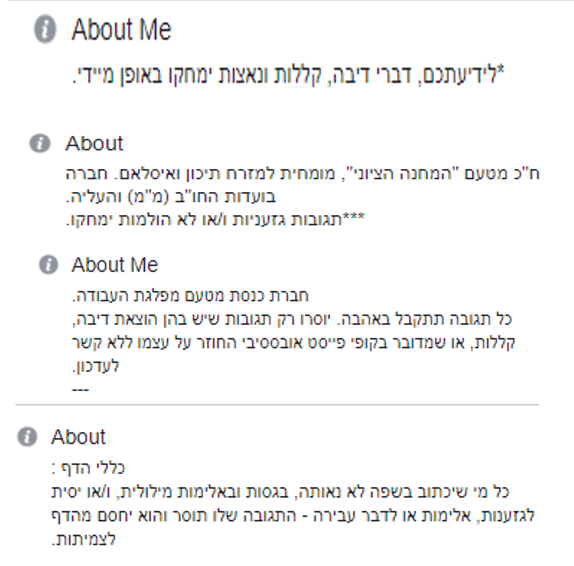



*********************************************************************
**Introduction: Term Frequency–Inverse Document Frequency (TF-IDF)**

Tf-Idf is a measure of a term (token) significance to a document (sub-corpus collection, e.g., collection of sentences) in the scope of a given corpus.

Tf-Idf is a factor of the relation between:

- Tf - a measure of how frequent a term is in each sub-corpus collection.

- Idf - an inverse measure of how frequent the term is in the entire corpus.
***********************************************************************
One motivation to analyze corpus token using the Tf-Idf measurement is to

**significantly enhance the relevance of a word in each sub-corpus collection**, 

which is achieved by the 

**reduction of the general way this term is distributed in the total scope of the corpus**.
***********************************************************************
Another STRONG motivation is that this measurement enabled us a an approach of

**words ranking system that explains the domain using semi-unsupervised techniques**.
***********************************************************************

## **3.1 - Enviroment Settings**

### **3.1.1 - Installations**

In [ ]:
!pip install hebrew_tokenizer

  Created wheel for hebrew-tokenizer: filename=hebrew_tokenizer-2.1.0-py3-none-any.whl size=12082 sha256=bb42827a9826956cf9ae414c099c21fb6555a093eeb70cd10818f239f02db506
  Stored in directory: /root/.cache/pip/wheels/5b/2c/ba/35bd5c37863121cb2b721aee7955a944f1a27949cdd3c81c87
Successfully built hebrew-tokenizer


### **3.1.2 - Library Functions**


**Set Wide\\Normal view of messages column**

In [ ]:
## set\reset the normal wiew options of the df
def normal_pd_view_settings(dataFrame, reset_all=False):
    if reset_all:
      return pd.reset_option("^display")
    else:
      pd.set_option("max_colwidth", 70)
      pd.set_option("max_row", 20)
      pd.set_option("min_row", 10)
      pd.set_option("max_column", dataFrame.shape[1])
      # pd.set_option("max_seq_items", 70)
      # pd.set_option("display.width", 10)
      return print('normal pd view settings in place')

In [ ]:
## change the wiew options of the df for wide observation
def wide_pd_view_settings(dataFrame):
    pd.set_option("max_colwidth", 800)
    pd.set_option("max_row", 400)
    pd.set_option("min_row", 40)
    pd.set_option("max_column", dataFrame.shape[1])
    return print('wide pd view settings in place')

## **3.2 - Import Packages and Modules**

In [ ]:
#Import here

import hebrew_tokenizer as ht
import nltk
from nltk.probability import FreqDist, ConditionalFreqDist
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

/content


/usr/local/lib/python3.7/dist-packages/hebrew_tokenizer/__init__.py:9: FutureWarning: Possible nested set at position 20
  from hebrew_tokenizer.api import tokenize


## **3.3 - Corpus tokens Exploration to discribe the data**

**Terminology:**

- token - linguistic n-gram unit.
- corpus - collection of tokens.
- bag of words (BOW) - set of unique tokens (out of the corpus)

In [ ]:
# Data Verification
# Create an empty dictionary for tokens
raw_token_bow_dict = dict()

for grp, token, token_num, (start_index, end_index) in ht.tokenize(' '.join(df.message.values.tolist())):
  raw_token_bow_dict[token] = grp

In [ ]:
# DEBUG
# Unique tokens from all groups of data (HEBREW, NUMBERS, URLs etc.)
print(len(raw_token_bow_dict))

22509


In [ ]:
# Data Verification
# Show tokenizer output (show non-unique occuarrences included) 
raw_tokens_lst = [token for grp, token, token_num, (start_index, end_index) in ht.tokenize(' '.join(df.message.values.tolist()))]
    
len(raw_tokens_lst) # DEBUG

106682

In [ ]:
# DEBUG
# Unique tokens (HEBREW, NUMBERS, URLs etc.)
raw_token_bow_lst = list(raw_token_bow_dict.keys())

len(raw_token_bow_lst) # DEBUG

22509

In [ ]:
# Filter only HEBREW tokens (non-unique occuarrences included) 
# We get non unique Hebrew words in our corpus, see num via debug stat.
 
heb_tokens_lst = [token for grp, token, token_num, (start_index, end_index) in ht.tokenize(
    ' '.join(df.message.values.tolist())) if grp == 'HEBREW']

print(len(heb_tokens_lst), # DEBUG
type(heb_tokens_lst)) # DEBUG

89818 <class 'list'>


In [ ]:
# Constract unique HEBREW tokens list 
heb_token_bow_lst = list(set(heb_tokens_lst))

print(len(heb_token_bow_lst), # DEBUG
type(heb_token_bow_lst)) # DEBUG

22078 <class 'list'>


In [ ]:
# Create freq object for hebrew tokens
heb_token_bow_freq = FreqDist(heb_tokens_lst)

print(heb_token_bow_freq.elements) # DEBUG
print(type(heb_token_bow_freq)) # DEBUG

<bound method Counter.elements of FreqDist({'את': 2314, 'לא': 2081, 'אתה': 1166, 'על': 1122, 'של': 949, 'זה': 784, 'מה': 692, 'לך': 642, 'שלך': 587, 'עם': 567, ...})>
<class 'nltk.probability.FreqDist'>


In [ ]:
# Motivation: We are looking to drop low frequency words
# (Which are part of human native languages)  
# Find single occourrence tokens
single_occour_tokens = heb_token_bow_freq.hapaxes()

print(len(single_occour_tokens), # DEBUG
type(single_occour_tokens)) # DEBUG

13858 <class 'list'>


In [ ]:
heb_token_and_freq_tup_dict = dict()
for k, v in heb_token_bow_freq.items():
  heb_token_and_freq_tup_dict[k] = (k, v)

In [ ]:
len(heb_token_and_freq_tup_dict)

22078

## **3.4 - Plot the word frequency\\to show single occourrence tokens** 

In [ ]:
# Create a DataFrame of word frequency

df_heb_token_bow_freq = pd.DataFrame(data=heb_token_bow_freq.values(), index=heb_token_bow_freq.keys(),
                                     columns=['N_freq']).sort_values(by='N_freq', ascending=False)

df_heb_token_bow_freq.reset_index(inplace=True)

df_heb_token_bow_freq.rename(columns={"index":"token"}, inplace=True)

df_heb_token_bow_freq['freq_dist'] = df_heb_token_bow_freq.token.map(heb_token_and_freq_tup_dict)

In [ ]:
# DEBUG
df_heb_token_bow_freq

,token,N_freq,freq_dist
0,את,2314,"(את, 2314)"
1,לא,2081,"(לא, 2081)"
2,אתה,1166,"(אתה, 1166)"
3,על,1122,"(על, 1122)"
4,של,949,"(של, 949)"
...,...,...,...
22073,גוזל,1,"(גוזל, 1)"
22074,הבלו,1,"(הבלו, 1)"
22075,לפינגווינים,1,"(לפינגווינים, 1)"
22076,שחסמו,1,"(שחסמו, 1)"


In [ ]:
# Explore the Data
df_heb_token_bow_freq.describe()

,N_freq
count,22078.000000
mean,4.068213
std,29.548924
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,2314.000000


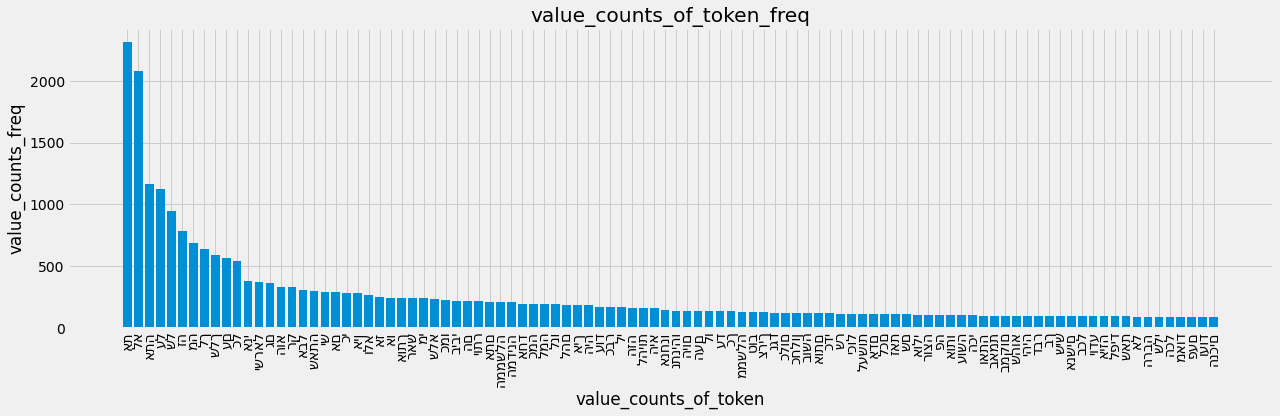

In [ ]:
# Plot words frequency 

plt.style.use('fivethirtyeight')

fig = plt.figure(figsize=(18, 6))
x = df_heb_token_bow_freq.token.values.astype(str).tolist()
y = df_heb_token_bow_freq.N_freq.values.tolist()
topK=100

plt.bar(x[:topK], y[:topK])
plt.xticks(x[:topK], rotation='vertical')
plt.title('value_counts_of_token_freq')
plt.xlabel('value_counts_of_token')
plt.ylabel('value_counts_freq')

plt.tight_layout()
plt.show()

### **3.4.1 - Plot the frequency of freq's (Appendix)** 

In [ ]:
# # this code create a dict "unique_feq_value_counts" that counts the frequency of words that appear in the corpus N times

# # Exp. : how many words appear in the corpus 1 times (or, 2 times.. etc.)

# # key = num of time the word apears in the corpus
# # value = how many words are they, that apear that many times

unique_freq_values = df_heb_token_bow_freq.N_freq.unique()

unique_freq_value_counts_dict = dict() 
for i in df_heb_token_bow_freq.N_freq: # unique list of freq
    unique_freq_value_counts_dict[i] = (len(df_heb_token_bow_freq[df_heb_token_bow_freq.N_freq==i]))

unique_freq_value_counts_dict

# len(df_ht_tokens_lst_freq.N_friq.unique())
len(unique_freq_value_counts_dict)

163

In [ ]:
df_unique_freq_value_counts = pd.DataFrame.from_dict(unique_freq_value_counts_dict, orient='index').reset_index()
df_unique_freq_value_counts.reset_index(drop=True, inplace=True)
df_unique_freq_value_counts.rename(columns={"index":"unique_freq_values_freq", 0:'unique_freq_values'}, inplace=True)

In [ ]:
df_unique_freq_value_counts

,unique_freq_values_freq,unique_freq_values
0,2314,1
1,2081,1
2,1166,1
3,1122,1
4,949,1
...,...,...
158,5,509
159,4,823
160,3,1431
161,2,3219


In [ ]:
df_unique_freq_value_counts['unique_freq_values_name'] =  df_unique_freq_value_counts.unique_freq_values_freq.astype(str) + ' :' + df_unique_freq_value_counts.unique_freq_values.astype(str)

In [ ]:
df_unique_freq_value_counts

,unique_freq_values_freq,unique_freq_values,unique_freq_values_name
0,2314,1,2314 :1
1,2081,1,2081 :1
2,1166,1,1166 :1
3,1122,1,1122 :1
4,949,1,949 :1
...,...,...,...
158,5,509,5 :509
159,4,823,4 :823
160,3,1431,3 :1431
161,2,3219,2 :3219


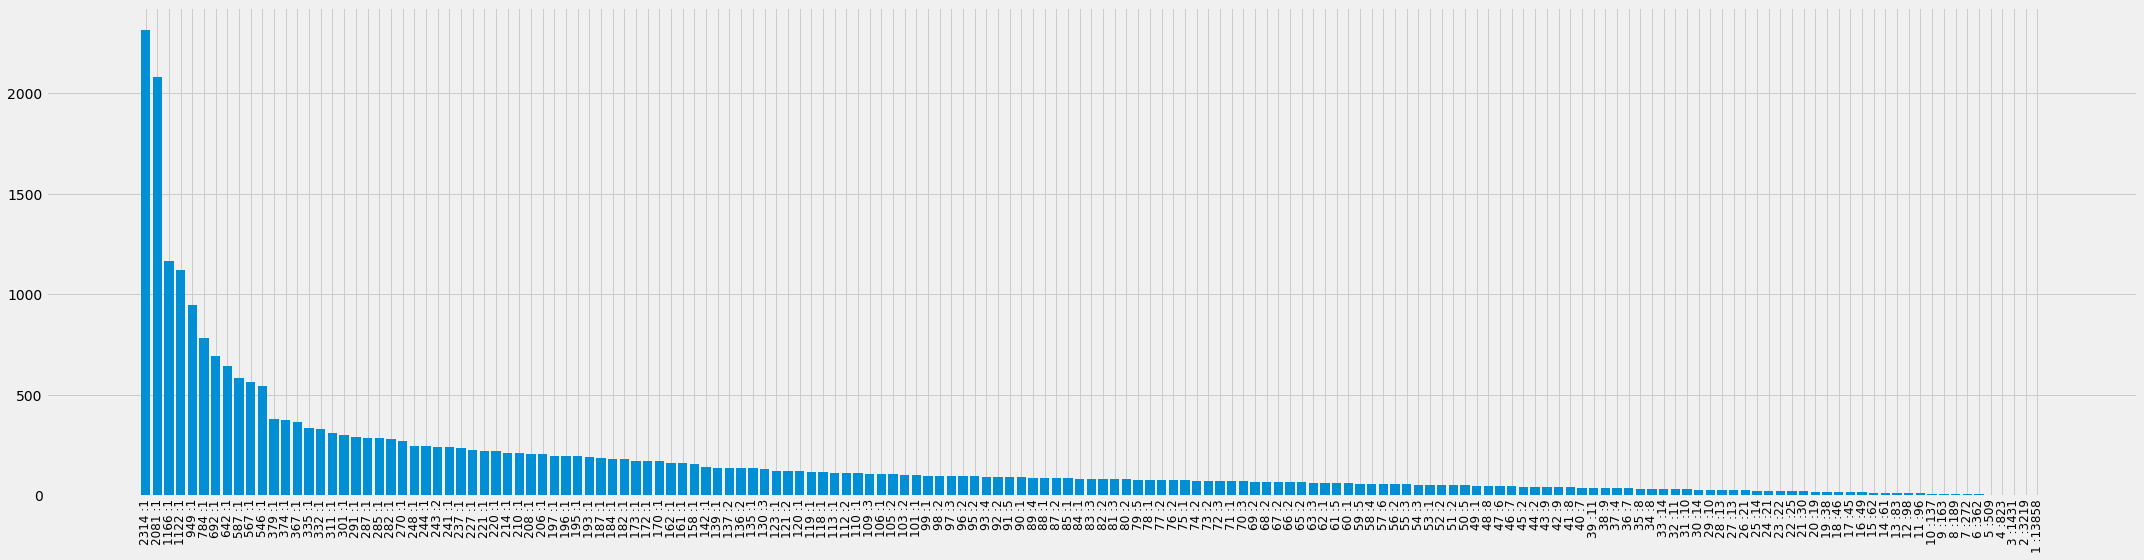

In [ ]:
# Plot the Data
# Conclusions: 
# Word that appears only 1 time will not be of use for the tf-idf vector since we only look to find word that are with meaningful use for most politicians
# will discard politicians that are not relevant to the scope of our ability to research (low data points) 

fig = plt.figure(figsize=(30, 8))
x=df_unique_freq_value_counts.unique_freq_values_name
y=df_unique_freq_value_counts.unique_freq_values_freq
plt.bar(x=x, height=y)

plt.xticks(x, rotation='vertical', fontsize=12)

plt.tight_layout()
plt.show()

## **3.5 - Remove politicians of too low activity (knee point🦵🏻\\lingual consideration)**


-  Some politicians deletion activity is much less frequent in the data.

-  Some politicians deletion activity found to be limited
- Lingual consideration: 

  (a) The deleted activity is lower than the “knee point”

  (b)  Expected to be less than 10% of the data



### **3.5.1 - Create DataFrame of individual politician deletions data**

In [ ]:
df_num_of_del_msg_per_pol = df.groupby('Politician').message.count().sort_values(ascending=False).to_frame().copy()
df_num_of_del_msg_per_pol.rename(columns={"message":"del_msg_per_pol"}, inplace=True)
df_num_of_del_msg_per_pol

,del_msg_per_pol
Politician,
Moshe Kahlon,293
Benjamin Netanyahu,265
Yair Lapid,251
Gilad Erdan,147
Tamar Zandberg,131
...,...
Yulia Malinovsky,1
Eyal BenReuven,1
Yossi Yonah,1


### **3.5.2 - Visualize individual politician deletions data distribution identifying the knee point**

<function matplotlib.pyplot.show>

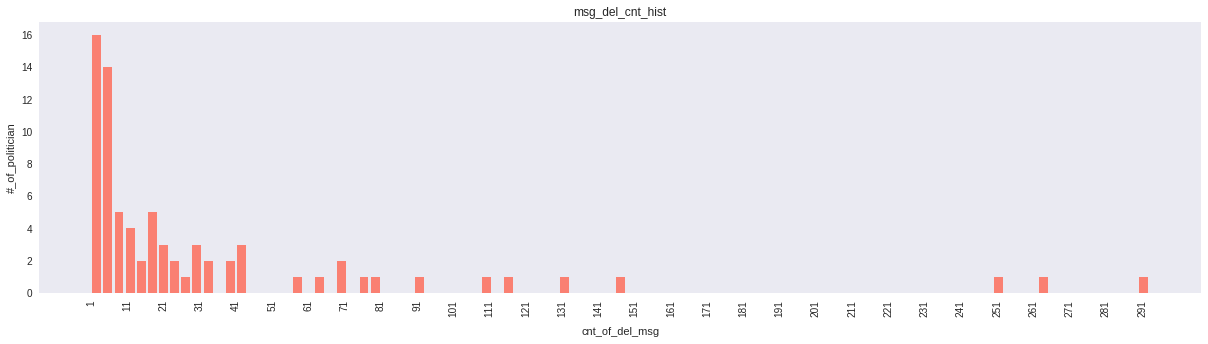

In [ ]:
plt.style.use('seaborn')

fig = plt.figure(figsize=(17, 5))

ax = df_num_of_del_msg_per_pol.del_msg_per_pol.hist(bins=95, rwidth=0.8, color='salmon', grid=False)
plt.title('msg_del_cnt_hist')
plt.xlabel('cnt_of_del_msg', labelpad=10)
plt.ylabel('#_of_politician')
plt.xticks(np.arange(int(df_num_of_del_msg_per_pol.del_msg_per_pol.min()), 300, step=10), rotation='vertical')
# plt.legend()
plt.tight_layout()
plt.show

### **3.5.3 - Visualize individual politician deletions data distribution after removing below knee point data**

15


<function matplotlib.pyplot.show>

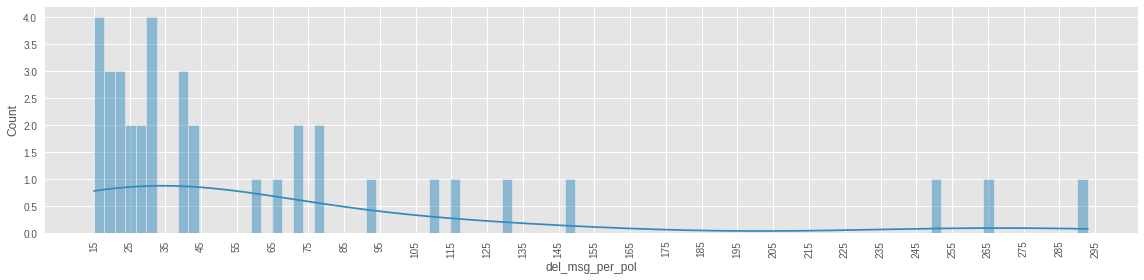

In [ ]:
# the variable created here filters for a minimal number that separates 2 different distributions
# we have set the variable to 14 after iterating to find the
knee_point = 14
df_num_of_del_msg_per_pol_thX = df_num_of_del_msg_per_pol[df_num_of_del_msg_per_pol.del_msg_per_pol > knee_point].copy()

# knee detection
print(int(df_num_of_del_msg_per_pol_thX.min()))

# new plot
plt.style.use('ggplot')
fig = plt.figure(figsize=(16, 4))
sns.histplot(data=df_num_of_del_msg_per_pol_thX, x=df_num_of_del_msg_per_pol_thX.del_msg_per_pol, bins=95, kde=True)
plt.xticks(np.arange(int(df_num_of_del_msg_per_pol_thX.min()), 300, step=10), rotation='vertical')
plt.tight_layout()
plt.show

### **3.5.4 - Visualize outliars (politician deletion data incl. below knee data)**

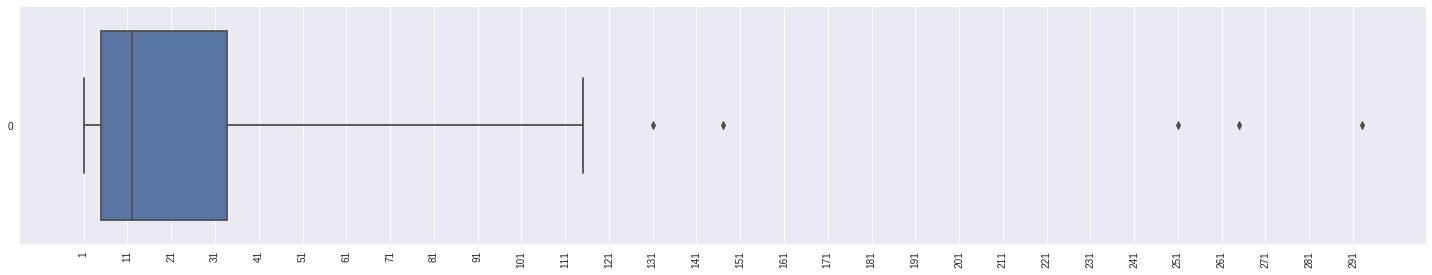

In [ ]:
# df.groupby('page_id')['del_msg_per_pol'].count()
plt.style.use('seaborn')
fig = plt.figure(figsize=(20, 30))
ax1 = fig.add_subplot(8, 1, 1)
fig1 = sns.boxplot(data=df_num_of_del_msg_per_pol.del_msg_per_pol, whis=3, orient='h')
plt.xticks(np.arange(int(df_num_of_del_msg_per_pol.del_msg_per_pol.min()), 300, step=10), rotation='vertical')
plt.tight_layout()

### **3.5.5 - Create a DataFrame that holds above the knee politicians' deletion data**

#### **3.5.5.1 - Verifing that above knee deletion data is above thresh hold**

In [ ]:
# setting threshold to 90% of our data (politician comments deletion)
DATA_THRESHOLD = 0.90

In [ ]:
print(df.shape[0]) # Absolut data - 100% of politician comments deletion

# up to DATA_THRESHOLD of all messages
is_over_XPercent = df.page_id.value_counts().cumsum() > (DATA_THRESHOLD * len(df))
rare_pol = is_over_XPercent[is_over_XPercent].index
df_delete_uptoXPercent_pols = df[~df.page_id.isin(rare_pol)].copy()

# DEBUG
print(df_delete_uptoXPercent_pols.shape[0]) # Absolut data left
print(df_delete_uptoXPercent_pols.shape[0]/df.shape[0]) # Percent of total original data above DATA_THRESHOLD

2655
2382
0.8971751412429378


#### **3.5.5.2 - Applying below knee data deletion to new DataFrame**

In [ ]:
# below knee point data (politicians' deletions)
below_knee_index_lst = df.groupby('page_id').filter(lambda x: x.message.count() > 14).groupby('page_id')['message'].count().index
below_knee_lst = list(below_knee_index_lst)

# apply
below_knee_df = df.loc[df.page_id.isin(below_knee_lst)].copy() # new DF
below_knee_df.reset_index(drop=True, inplace=True) # reindexing

# DEBUG
print(below_knee_df.shape[0]) # Absolut data left
print(below_knee_df.shape[0]/df.shape[0]) # Percent of total original data (below knee point = over 14 deletions)

2447
0.9216572504708098


**For terminology reasons we will call below_knee_df - "df_new" (to match old "df")**

In [ ]:
df_new = below_knee_df.copy()
df_new.reset_index(drop=True, inplace=True)
df_new.shape

(2447, 7)

In [ ]:
wide_pd_view_settings(df_new)

wide pd view settings in place


In [ ]:
df_new

,created_at,deletedAt,id,message,page_id,Politician,Wing
0,2018-02-13 13:43:14,2018-02-13 14:15:37,1972265946121334_1972449156103013,רואים איך היא בלחץ גם מפלגת כולנו בדרך הביתה. ממשלה מושחתת. מפלגה משוחתת. הביתה דיי לשקרים. לא נישכח לא ניסלח,1000293466651925,Merav Ben Ari,LEFT_WING
1,2018-02-12 18:55:00,NaT,1754202071304803_1754231807968496,רק אותי הוא מצחיק?? דמגוג ופופוליסט בשנקל...והתגובות הנלהבות של עדר המעריצים זה כבר מביך...,107836625941364,Yair Lapid,LEFT_WING
2,2018-02-13 19:00:51,2018-02-13 19:02:26,1972265946121334_1972752722739323,מה שיפה שדאגו לעצמם לעלייה של 5000 שקל בחודש 60000 שקל בשנה. עלייה השכר של שנה אחת למושחתי הכנסת שווה ל12 שנה של תוספת ה500 שקל של קיצבת נכות. מקווה הממשלה הזאת תתמוטט,1000293466651925,Merav Ben Ari,LEFT_WING
3,2018-02-12 19:23:01,NaT,1754202071304803_1754251124633231,"יהיר עלוב נפש , אתה בדיחה עלובה ופאטתית , בינך ובין יהדות אין דבר וחצי דבר כך בינך לבין ארץ ישראל .",107836625941364,Yair Lapid,LEFT_WING
4,2018-02-13 21:51:32,2018-02-13 21:53:30,1755393887852288_1755402704518073,"מעולם לא תמכתי בביבי, זו האמת! וידוי נוסף- הצבעתי לך פעם אחת בבחירות.היום אני חד משמעית מודה שאני מתביישת ששמתי את הפתק שלך! ללא ספק המעשה הכי נמוך שלך והכי לא ראוי שלך- ככה לא זוכים להיות ראש ממשלה! מציעה לשלוח קורות חיים לאולפן שישי אולי הם ישמחו לקבל אותך בחזרה, למרות שאני בספק שאפילו הם רוצים.",107836625941364,Yair Lapid,LEFT_WING
5,2018-02-13 22:02:46,2018-02-13 22:15:46,1755393887852288_1755412644517079,"השמחה לאיד וחשיפת העובדה שנתת עדות נגד נתניהו דווקא יעבדו לרעתך, יהיר. לא תהיה ראש ממשלה אף פעם.",107836625941364,Yair Lapid,LEFT_WING
6,2018-02-13 22:42:47,2018-02-14 01:07:29,1755393887852288_1755445607847116,תסביר ל ומה הקשר שלך לדוברת המשטרה זה לא שחיתות,107836625941364,Yair Lapid,LEFT_WING
7,2018-02-13 21:51:29,2018-02-14 02:46:36,1755393887852288_1755402631184747,אדון לפיד אתה תעשה הכל להפיל את ביבי.. אבל לא יעזור לך העם סומך רק על ביבי!!!,107836625941364,Yair Lapid,LEFT_WING
8,2018-02-14 04:31:49,2018-02-14 04:55:39,1755393887852288_418922668528483,"יאיר לפיד,איך אתה שעבדתה אצל נוני מוזס והיסתכרתה במשכורת שמנה מאוד יכול ביכלל להעיד בתיקים אלו?כן אותי נוני שעשה לך מסיבה כאשר היצטרפתה לפוליטיקה,אתה לא תהיה ראש ממשלה מר לפיד,וגם לא תיבחר לשילטון,אזרחי ישראל לא טיפשים ופריירים ורואים טוב מאוד מי מריץ אותך לראשות ממשלה,אתה איש שמאל בתחפושת וכך גם מיפלגתך,רק לראות מי מרכיב אותה,עופר שלח!!!הוא יותר שמאל מרביב דרוקר,יעל גרמן!!!חברת עירייה מטעם מרץ,אזרחי ישראל לא טיפשים וככה לא ניבחרים לשילטון במדינה דמוקרטית,על ידי הכשלת ראש ממשלה,ותמיד טוב להזכיר,ליפני שתיתלונן על שחיתות ענה לנו מדוע זה לא נחקר כאשר מפלגתך העבירה לבוס לשעבר שלך מיליוני שקלים בדמות פירסומים בעיתון שבוא אתה ראש המיפלגה עבדתה?:https://b.walla.co.il/item/2671233",107836625941364,Yair Lapid,LEFT_WING
9,2018-02-14 13:07:57,2018-02-14 13:13:28,1756006791124331_1756014451123565,אף אחד לא מאיים עליך. אתה סתם נטפל לאמירה אידיוטית של אמסלם. אתה מעיד נגד נתניהו כי אתה הבנת שלא תנצח אותו בקלפי!,107836625941364,Yair Lapid,LEFT_WING


### **3.5.6 - Visualize boxplot before and after removing below knee data**

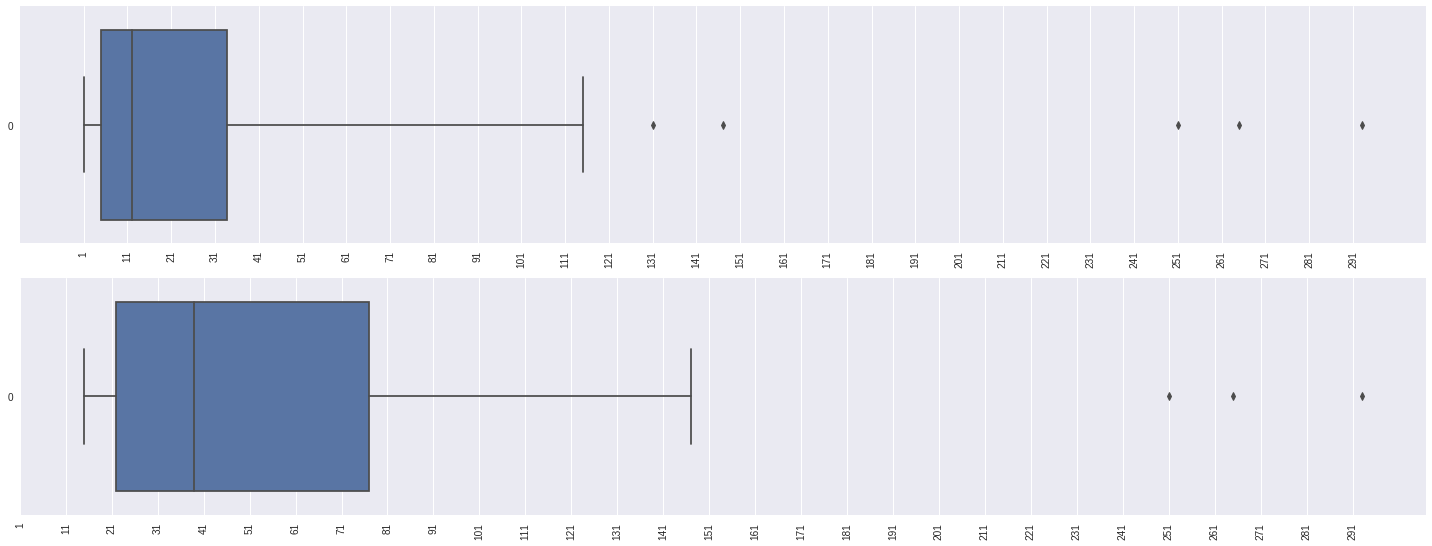

In [ ]:
plt.style.use('seaborn')
fig = plt.figure(figsize=(20, 30))
ax1 = fig.add_subplot(8, 1, 1)
fig1 = sns.boxplot(data=df_num_of_del_msg_per_pol.del_msg_per_pol, whis=3, orient='h')
plt.xticks(np.arange(int(df_num_of_del_msg_per_pol.del_msg_per_pol.min()), 300, step=10), rotation='vertical')
plt.tight_layout()
ax2 = fig.add_subplot(8, 1, 2)
fig2 = sns.boxplot(data=df_new.groupby('Politician').message.count(), whis=3, orient='h')
plt.xticks(np.arange(int(df_num_of_del_msg_per_pol.del_msg_per_pol.min()), 300, step=10), rotation='vertical')
plt.tight_layout()
plt.show()

### **3.5.6 - Visualize above knee data (politicians' deletions)**

<function matplotlib.pyplot.show>

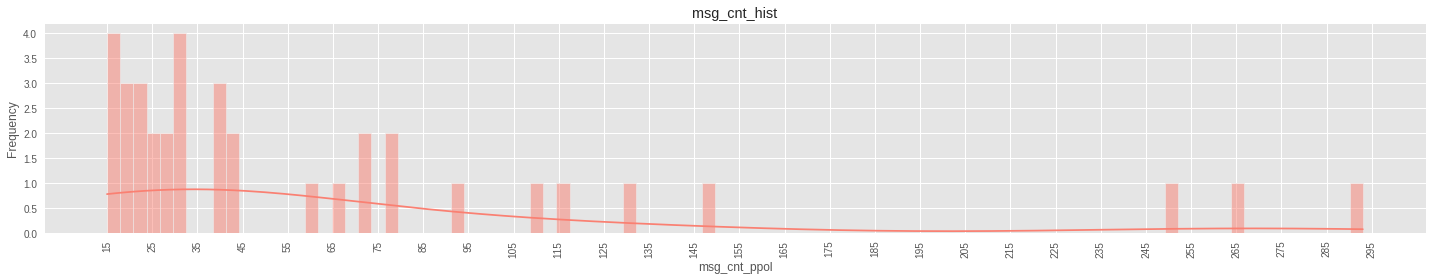

In [ ]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(20, 4))
sns.histplot(data=df_new.page_id.value_counts(), bins=95, color='salmon', kde=True)
plt.title('msg_cnt_hist')
plt.xlabel('msg_cnt_ppol')
plt.ylabel('Frequency')
plt.xticks(np.arange(int(df_new.page_id.value_counts().min()), 300, step=10), rotation='vertical')
plt.tight_layout()
plt.show

In [ ]:
# DEBUG
df_new.Politician.nunique()

37

### **3.5.7 - Visualize Deleted Comments Normalized By Followers**

In [ ]:
all_politicians_page_ids = list(map(int, df.page_id.unique()))
politician_page_ids_kept = list(map(int, df_new.page_id.unique()))
politician_page_ids_excluded = list(set(all_politicians_page_ids) - set(politician_page_ids_kept))

In [ ]:
likes_followers_df_excluded = likes_followers_df.drop(index=politician_page_ids_kept).copy()
likes_followers_df_kept = likes_followers_df.drop(index=politician_page_ids_excluded).copy()

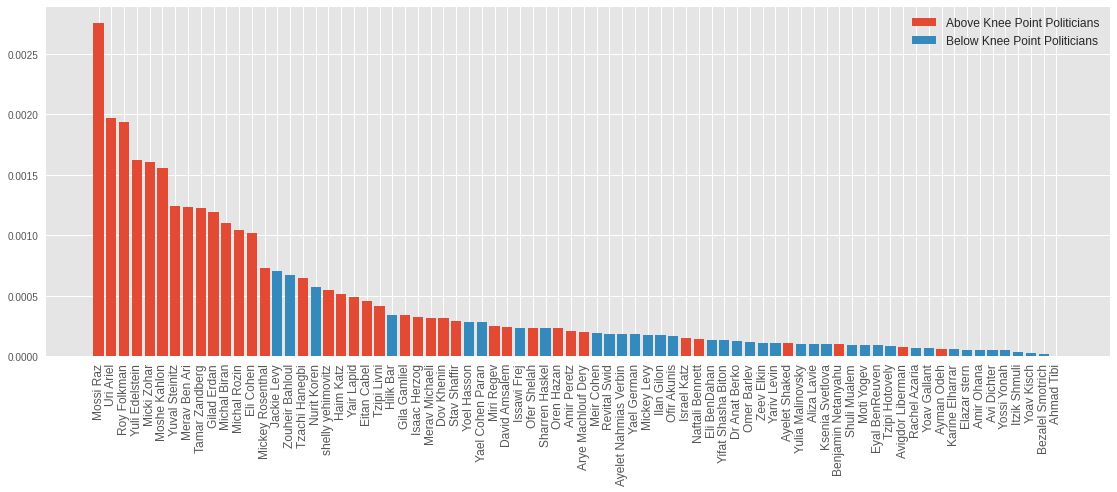

In [ ]:
# Create a bar plot for comments deletions normalized by page followers

fig = plt.figure(figsize=(17,6))
ax = fig.add_subplot(1, 1, 1)

fig1 = ax.bar(x=likes_followers_df['Politician'], height=likes_followers_df['Deletion_Followers_ratio'])
fig2 = ax.bar(x=likes_followers_df_excluded['Politician'], height=likes_followers_df_excluded['Deletion_Followers_ratio'])
plt.setp(ax.xaxis.get_majorticklabels(), rotation=90, fontsize=12)
ax.legend((fig1, fig2), ('Above Knee Point Politicians', 'Below Knee Point Politicians'), fontsize=12)
plt.show()

## **3.6 - Create functions for addind clean-text column, and for TfIdf-BOW**

In [ ]:
def msg_cleaner(data_frame, re_pattern=False, stp_wrds=[], n_gram_wrds=[], name=False):
    message_lst = list()
    msg_clean_lst = list()

    if name: # relates the case of tf-idf corpus (make a name-specipic clean BOW)
        message_lst = data_frame.loc[data_frame.Politician == name]["clean_msg"].values.tolist()
    else: # relates the case of creating clean_msg column
        try: # try to make the for-loop list
            message_lst = data_frame.clean_msg.values.tolist()
        except AttributeError: # if its none make tamplate
            data_frame['clean_msg'] = df.message
        finally: # then make creating clean_msg column
            if not message_lst:
              message_lst = data_frame.clean_msg.values.tolist()
    
    # tokenizer
    for text in message_lst:

        # 1 Tokenize
        words = [token for grp, token, token_num, (start_index, end_index) in ht.tokenize(text)]

        # 2 - Filter tokenized word for heb type
        words = [w for w in words if w in heb_token_bow_lst]
        
        # 3 - Relates the case of tf-idf corpus
        # Removing stopwords
        if stp_wrds:
            words = [w for w in words if not w in set(stp_wrds)]

        # 4 - Relates the case of tf-idf corpus
        # Removing heb tokens that apear only 1 time in the data
        if n_gram_wrds:
            words = [w for w in words if not w in single_occour_tokens]
        line = ' '.join(words)

        # 5 - Spetial if needed cleaning
        if re_pattern:
            re_pattern = re_pattern
            line = re_pattern.sub(' ', line)

        # 6 - Clean ws and append to list
        line = re.compile(r'[\s]+').sub(' ', line)
        msg_clean_lst.append(line)

    # Relates the case of tf-idf corpus  
    if name:
      return msg_clean_lst

    # Relates the case of creating clean_msg column 
    return pd.Series(data=msg_clean_lst, index=data_frame.index)

## **3.7 -Add the clean_msg column**

In [ ]:
# init arg.
re_pattern = re.compile(r'[^\w!(),.]+')

# invoc.
df_new['clean_msg'] = msg_cleaner(df_new, re_pattern)

In [ ]:
# DEBUG - example
wide_pd_view_settings(df_new)
df_new.loc[df_new.message.str.contains('מלשן העם לא אוהב מלשנים רקקק ביבי')]

wide pd view settings in place


,created_at,deletedAt,id,message,page_id,Politician,Wing,clean_msg
193,2018-02-19 14:08:19,2018-02-19 14:15:48,1761447497246927_1761458630579147,שתנקר.מלשן העם לא אוהב מלשנים רקקק ביבי 🇮🇱🇮🇱🇮🇱👑👑👑👑👑💪💪💪,107836625941364,Yair Lapid,LEFT_WING,קשקשן לא כל הזדמנות כשרה לדבר שטויות תן לצבא לבדוק את עצמו הוא עושה את זה תשאר בכלכלה אולי שם אתה מבין משהו


In [ ]:
# DEBUG
df_new.shape

(2447, 8)

## **3.8 - Delete NON-TEXT Comments**

In [ ]:
# find NON-TEXT Comments
df_new[df_new.clean_msg == '']

,created_at,deletedAt,id,message,page_id,Politician,Wing,clean_msg
162,2018-02-14 14:55:15,2018-02-14 15:26:32,1309105812522980_1309193439180884,"אתה לא מבין שהוא מינה אותך לתפקיד כי אתה מביך, פתאטי ולא מאיים עליו? הוא פשוט ימשיך להקיף את עצמו במוקיונים לקקנים כמוך כדי להיראות טוב יותר.",646669815433253,David Amsalem,RIGHT_WING,
766,2018-03-08 15:28:59,2018-03-08 15:37:28,1821555261229667_1821944191190774,כלב זה לא ספאם הכי משונה מכל התיקים הוא תיק 1270 .אייך ?? למה 1270 ?? .השופטת גרפטל מקבלת הצעת שוחד לפני שנתיים .מעבירה את הידעה על ההצעת שוחד לחברתה שהיום נשיאת בית מישפט עליון השופטת חיות .שתיהם לא עושות מזה עניין .לא מתלוננות במישטרה .ואוף עוברות שנתיים ויש תיק. משונה שמספרו משום מה 1270 .השופטת גרפטל מתבקשת לעשות עימות עם החבר שחשוד בהצעת השוחד .והיא אומרת שהיא מסכימה בתנאי שלא יעצרו את החבר. מעניין למה 1270 ? מישהו יודע ?עוד יקום קצין מישטרה בכיר .וישר שיהייה מוכן להיות עד מדינה .ולהוציא את כל השחתיות מהמשטרה .במיוחד מיחידת להב 433 שכולה מורכבת משמאל קיצוני .שונאי נתניהו והימין .והמתיישבים .ונגד הגירוש .למעשה נגד העם .250 מליון שקל על חקירות שבסוף מובילותעוד יקום קצין מישטרה בכיר .וישר שיהייה מוכן להיות עד מדינה .ולהוציא את כל השחתיות מהמשטרה .במיוחד מיחידת להב 433 שכולה מורכבת ...,632771873441351,Mossi Raz,LEFT_WING,
2307,2018-04-24 17:34:29,2018-04-25 04:01:48,1872196732832186_1872659862785873,זוכר את הכומר שהעביר פצצות לעזה.. שנים לא בדקו אותו בגלל אנשים כמוך.. לא צריך להפשיט אותה נכון אפשר לבדוק בדרכים אחרות אבל מה שאתה עושה זו הסתה.. אתה יכול לעשות את זה בדרכים דיפלומטיות.. אבל למה שתעשה את זה. אם תעשה את זה בצנעה אתה תפסיק תמיכה .. אז עדיף לפגוע בשמה של המדינה,632771873441351,Mossi Raz,LEFT_WING,
2399,2018-04-26 10:36:02,2018-04-26 11:37:10,1678880812208727_1678967842200024,"הראיון רק הדגיש עוד יותר כמה שאת צבועה ואינטרסנטית. בתור דוברת צה""ל היית הכי אנטי מתנחלים שיש, עכשיו כשאת צריכה קולות בפריימריז את מתהפכת כמו סטייק. אנשים כמוך הם בושה לליכוד. אגב אני מתחיל להאמין שבאמת שקלת להתפקד למפלגת העבודה כמו שפורסם בזמנו.",118410851589072,Miri Regev,RIGHT_WING,


In [ ]:
# apply
df_new.drop(df_new[df_new.clean_msg == ''].index, inplace=True)

# reset index
df_new.reset_index(drop=True, inplace=True)

# DEBUG
df_new.shape

(2443, 8)

## **3.9 - Create and set a column which holds the deletion justification tagging**

 - We are looking for comments that contain those words to determine whether the deletion was justified or not
 - According to the page manager criteria.

### **3.9.1 - Retrive list for HEB_STOPWORDS from file**

We acquired stop-words via this link - https://github.com/NLPH/NLPH_Resources


#### **3.9.1.1 - Upload heb_stopwords file & Reading heb_stopwords file to a DataFrame**

In [ ]:
# 23K hebrew stop-word uploadind
path_2 = '/content/drive/MyDrive/Project2_EDA/data/stopwords.xlsx'
df_stop_words = pd.read_excel(path_2)

#### **3.9.1.2 - Make a list out of the words**

In [ ]:
# applying heb stop_words to list 
heb_stopwords = list(set(df_stop_words.Undotted.values.tolist()))

heb_stopwords[50:60] # DEBUG

['נולד',
 'מלחמה',
 'התעוררות',
 'מחויבות',
 'היינו',
 'חולני',
 'הואץ',
 'תקצוב',
 'זעפרן',
 'חריש']

### **3.9.2 - Create the corpus for tf-idf**

##### **3.9.2.1 - Create the first_iter corpus for tf-idf**

In [ ]:
# def bow_maker_for_per_pol_lst():
#   re_pattern=re.compile(r'[0-9%]')
#   per_pol_message_lst = list()
#   for name in list(df_new.Politician.unique()):
#     pol_corpus = msg_cleaner(df_new, re_pattern, heb_stopwords, single_occour_tokens, name=name)
#     pol_corpus = ' '.join(pol_corpus) # this will make the diff between "list of str msg per pol" \ "list of lists of msg per pol" - comment to make a list of lists per pol
#     per_pol_message_lst.append(pol_corpus)
#   return per_pol_message_lst

In [ ]:
# bow_per_pol_lst = bow_maker_for_per_pol_lst()
# len(bow_per_pol_lst)

37

##### **3.9.2.1 - Create the main corpus for tf-idf**

In [ ]:
def make_tfidf_BOW():
  re_pattern = re.compile(r'[0-9%]')
  msg_corpus_cleaned_ppol_ser = msg_cleaner(df_new, re_pattern, heb_stopwords, single_occour_tokens)
  msg_corpus_cleaned_ppol_lst = msg_corpus_cleaned_ppol_ser.values.tolist()
  return msg_corpus_cleaned_ppol_lst

In [ ]:
tfidf_BOW_lst = make_tfidf_BOW()

#### **3.9.3 - Use tf-idf (via tklearn vectorizer) to evaluate common words in our corpus - from which we can detact curse words**

In [ ]:
# Step 1: Vectorizer creation to fit the corpus

tfidf_vectorizer = TfidfVectorizer(input='content', sublinear_tf=False)
tfidf_vector = tfidf_vectorizer.fit_transform(tfidf_BOW_lst)

# Step 2: Make a tfidf Data Fame out of the vectorizer
tfidf_df = pd.DataFrame(tfidf_vector.toarray(), index=df_new["Politician"].values.tolist(), columns=tfidf_vectorizer.get_feature_names())

# DEBUG
tfidf_df

,אבות,אבותינו,אבחר,אביך,...,תתקדם,תתקן,תתרכזי,תתרמי
Merav Ben Ari,0.0,0.0,0.0,0.0,...,0.00000,0.0,0.0,0.0
Yair Lapid,0.0,0.0,0.0,0.0,...,0.00000,0.0,0.0,0.0
Merav Ben Ari,0.0,0.0,0.0,0.0,...,0.00000,0.0,0.0,0.0
Yair Lapid,0.0,0.0,0.0,0.0,...,0.00000,0.0,0.0,0.0
Yair Lapid,0.0,0.0,0.0,0.0,...,0.00000,0.0,0.0,0.0
Yair Lapid,0.0,0.0,0.0,0.0,...,0.00000,0.0,0.0,0.0
Yair Lapid,0.0,0.0,0.0,0.0,...,0.00000,0.0,0.0,0.0
Yair Lapid,0.0,0.0,0.0,0.0,...,0.00000,0.0,0.0,0.0
Yair Lapid,0.0,0.0,0.0,0.0,...,0.00000,0.0,0.0,0.0
Yair Lapid,0.0,0.0,0.0,0.0,...,0.00000,0.0,0.0,0.0


In [ ]:
# for first-iter BOW
# tfidf_vectorizer = TfidfVectorizer(input='content', sublinear_tf=False)
# tfidf_vector = tfidf_vectorizer.fit_transform(bow_per_pol_lst)
# tfidf_df = pd.DataFrame(tfidf_vector.toarray(), index=df_new["Politician"].unique(), columns=tfidf_vectorizer.get_feature_names())
# tfidf_df

### **3.9.4 - Ranking token list and take top X rank (as they give high relevant to the deleted messages)**

 - **Avoid overfitting Plus faster cleaning abilities**

#### **3.9.4.1 - transforming the df to contain pol_name, word, and tfidf columns**

In [ ]:
tfidf_df_stp2 = tfidf_df.stack().reset_index().rename(columns={0:'tfidf', 'level_0': 'pol_name','level_1': 'word'}).copy()
tfidf_df_stp2

,pol_name,word,tfidf
0,Merav Ben Ari,אבות,0.0
1,Merav Ben Ari,אבותינו,0.0
2,Merav Ben Ari,אבחר,0.0
3,Merav Ben Ari,אביך,0.0
4,Merav Ben Ari,אבלים,0.0
5,Merav Ben Ari,אבנים,0.0
6,Merav Ben Ari,אבקש,0.0
7,Merav Ben Ari,אברה,0.0
8,Merav Ben Ari,אדוני,0.0
9,Merav Ben Ari,אדוניהם,0.0


#### **3.9.4.2 - Creating top 20 (or 100 or 500) words (as to tfidf rank) - and per pol_name**

In [ ]:
tfidf_df_stp2_top_20 = tfidf_df_stp2.sort_values(by=['pol_name','tfidf'], ascending=[True,False]).groupby(['pol_name']).head(20).copy()
tfidf_df_stp2_top_50 = tfidf_df_stp2.sort_values(by=['pol_name','tfidf'], ascending=[True,False]).groupby(['pol_name']).head(50).copy()
tfidf_df_stp2_top_75 = tfidf_df_stp2.sort_values(by=['pol_name','tfidf'], ascending=[True,False]).groupby(['pol_name']).head(75).copy()
tfidf_df_stp2_top_100 = tfidf_df_stp2.sort_values(by=['pol_name','tfidf'], ascending=[True,False]).groupby(['pol_name']).head(100).copy()
tfidf_df_stp2_top_500 = tfidf_df_stp2.sort_values(by=['pol_name','tfidf'], ascending=[True,False]).groupby(['pol_name']).head(500).copy()

In [ ]:
# show final df from which high tfidf values will be extracted
tfidf_df_stp2_top_100

,pol_name,word,tfidf
14061362,Amir Peretz,שישאיר,0.684623
14057006,Amir Peretz,הדעות,0.659053
104687,Amir Peretz,יחגגו,0.633185
14052876,Amir Peretz,כים,0.623296
14054323,Amir Peretz,מצייצים,0.623296
2203913,Amir Peretz,מיהו,0.604664
2204451,Amir Peretz,נישאר,0.604664
6810021,Amir Peretz,דחפת,0.574519
103443,Amir Peretz,המשפחה,0.542877
14047493,Amir Peretz,לסכסך,0.535172


### **3.9.5 - Create a token list for curses detection**

#### **3.9.5.1 - Top 100 words per politician to DF Plus to CSV**

In [ ]:
# creat a list of the high tfidf values
top_100_worsd = pd.DataFrame(data=set(tfidf_df_stp2_top_100.word.values.tolist()))

# extracting words from list to txt file for first evaluation
top_100_worsd.to_csv('/content/drive/MyDrive/Project2_EDA/data/top_100_worsd.txt', index=False, header=False)

#### **3.9.5.1 - Filter manually Hebrew curses and derogatory words Plus ranking**

After manually filtering curses and derogatory words - we were left with a ranked list consist of 2 ranked types: 

- consensus curses and racism type 

- a potential derogatory words type 

************************************************************************

#### **3.9.5.2 - Upload curses file to make curses DF**

In [ ]:
# extracting words from xlsx file to DF
# filtered derogatory words(consensus curses) OR second evaluation (potential derogatory words)
path_xlsx = '/content/drive/MyDrive/Project2_EDA/data/curses_with_rank.xlsx'
df_curses = pd.read_excel(path_xlsx)

# DEBUG
wide_pd_view_settings(df_curses)
df_curses

wide pd view settings in place


,Token,Rank
0,מסריח,2
1,להקיא,2
2,הטמטום,2
3,הכושל,2
4,שנוא,2
5,מפגר,3
6,ופתאטי,2
7,הפולנים,2
8,שונאים,2
9,הסורי,2


In [ ]:
# Create filtered derogatory words ser
ser_is_derogatory = df_curses.loc[df_curses['Rank'] > 2]

# insert filtered derogatory words to a list
curses_lst = list(set(ser_is_derogatory.Token.tolist()))

In [ ]:
# Create filtered potential curse words ser
ser_potential_curses = df_curses.loc[df_curses['Rank'] == 2]

# insert filtered potential curse words to a list
potential_curses_lst = list(set(ser_potential_curses.Token.tolist()))

In [ ]:
len(potential_curses_lst)

195

### 🔻

#### **3.9.5.3 - check potential_curses against clean msg records**

In [ ]:
bigrams = ngrams(heb_tokens_lst, 2)
bigrams_Freq_Dist = ConditionalFreqDist(bigrams)

In [ ]:
bigrams_Freq_Dist

ConditionalFreqDist(nltk.probability.FreqDist,
                    {'רואים': FreqDist({'אותך': 1,
                               'אותכם': 1,
                               'איך': 1,
                               'את': 4,
                               'בבניין': 1,
                               'בלי': 1,
                               'ועדים': 1,
                               'טוב': 1,
                               'מישהו': 1,
                               'ערוץ': 1,
                               'פרוטוקול': 1,
                               'שאתה': 1,
                               'שאתם': 1,
                               'שביבי': 1,
                               'שגונבים': 1,
                               'שזה': 1,
                               'שנכנסת': 1}),
                     'איך': FreqDist({'אבל': 1,
                               'אדם': 1,
                               'אומרים': 1,
                               'אומרת': 1,
                               'אי': 1,
   

In [ ]:
# def make_BOW_all_pol_ppol_dict():
#   re_pattern=re.compile(r'[0-9%]')
#   bow_per_pol_dict = dict()
#   for name in list(df_new.Politician.unique()):
#     pol_corpus = msg_cleaner(df_new, re_pattern, heb_stopwords, single_occour_tokens, name=name)
#     pol_corpus = ' '.join(pol_corpus)
#     bow_per_pol_dict[name] = pol_corpus
#   return bow_per_pol_dict

# bow_per_pol = make_BOW_all_pol_ppol_dict()

In [ ]:
# for word in potential_curses_lst:
#   followers = [x[0] for x in bigrams_Freq_Dist[word].most_common(3)]

In [ ]:
# init param.
comments_to_check = df_new.clean_msg.values.tolist()
deletion_to_check = list()

# filter for roes, neglecting words we havent allrdy found to be curses
for comment in comments_to_check:
  comment_words = [token for grp, token, token_num, (start_index, end_index) in ht.tokenize(comment) if grp == 'HEBREW']
  potential_curses_in_comment = False
  for word in comment_words:
    if word in potential_curses_lst and not word in curses_lst:
      potential_curses_in_comment = word
      break
  deletion_to_check.append(potential_curses_in_comment)

In [ ]:
# init df_potential_curses_to_check df
df_potential_curses_to_check = df_new.copy()

# add 'deletion_to_check' column
df_potential_curses_to_check['deletion_to_check'] = deletion_to_check

# make new df for the 'deletion_to_check' filtering pros.
df_deletion_to_check_word_vs_msg = df_potential_curses_to_check.loc[df_potential_curses_to_check.deletion_to_check != False][['clean_msg','deletion_to_check']].copy()

# DEBUG
df_deletion_to_check_word_vs_msg.shape

(650, 2)

In [ ]:
# TAGGING!!
wide_pd_view_settings(df_deletion_to_check_word_vs_msg)

df_deletion_to_check_word_vs_msg.sort_values

In [ ]:
normal_pd_view_settings(df_new)

normal pd view settings in place


### **3.9.6 Adding a justified deletion column using the curses list**

#### **3.9.6.1 - Iterate over all comments and look for curses**

In [ ]:
# init param.
message_to_tag_lst = df_new.clean_msg.values.tolist()
justified_deletion_lst = list()

# Tagging for final derogatory words
for row in message_to_tag_lst:
  comment_words = [token for grp, token, token_num, (start_index, end_index) in ht.tokenize(row) if grp == 'HEBREW']
  comment_is_curse = False
  for word in comment_words:
    if word in curses_lst:
      comment_is_curse = True
      break
  justified_deletion_lst.append(comment_is_curse)

#### **3.9.6.2 - Add a justified_deletion column**

In [ ]:
df_new['justified_deletion'] = justified_deletion_lst

# DEBUG
df_new.sample(3)

,created_at,deletedAt,id,message,...,Politician,Wing,clean_msg,justified_deletion
1044,2018-03-16 08:38:58,2018-03-16 08:40:49,1829083230448708_1829731473717217,"😂😂😂 מי את שבכלל תשאלי את השאלה הזו?? קודם תאמיני בבורא עולם,ורק לא...",...,Merav Michaeli,LEFT_WING,מה חובות של מיליונים שהשארתם לספקים אחרי שברחת ממפלגת קדימה,False
1476,2018-03-29 18:01:39,2018-03-30 05:09:33,1702466556496236_1702478103161748,חג שמח לך ולכל הקשישים שבזכותך מבינים את מקומם.,...,Gila Gamliel,RIGHT_WING,ליל הבדולח זה כלום לעומת מה שאתם עושים פשוט בושה מוסי איך מתבטא הי...,False
1712,2018-04-04 11:42:42,2018-04-04 13:37:30,10156631202484218_10156631549414218,"עדיף לתרום לדאע""ש - הקרן לישראל חדשה מסוכנת יותר מהחמאס",...,shelly yehimovitz,LEFT_WING,אחרי צוק איתן שהעמדה המדינית של ישראל הייתה פירוז תמורת שיקום הרצו...,True


In [ ]:
# DEBUG
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2443 entries, 0 to 2442
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   created_at          2443 non-null   datetime64[ns]
 1   deletedAt           2393 non-null   datetime64[ns]
 2   id                  2443 non-null   object        
 3   message             2443 non-null   object        
 4   page_id             2443 non-null   object        
 5   Politician          2443 non-null   object        
 6   Wing                2443 non-null   object        
 7   clean_msg           2443 non-null   object        
 8   justified_deletion  2443 non-null   bool          
dtypes: bool(1), datetime64[ns](2), object(6)
memory usage: 155.2+ KB


#### **3.9.6.3 - Visualize Justified Deletions vs NON-Justified Deletions**

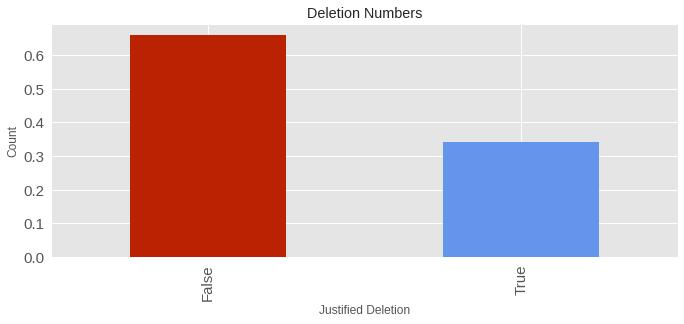

In [ ]:
  plt.style.use('ggplot')
  mycolors = ['#BB2201', '#6495ED']
  df_new['justified_deletion'].value_counts(normalize=True).plot(kind='bar', color=mycolors, figsize=(10,4))
  plt.title('Deletion Numbers')
  plt.xlabel('Justified Deletion')
  plt.ylabel('Count')
  plt.tick_params(labelsize=15)
  plt.show()

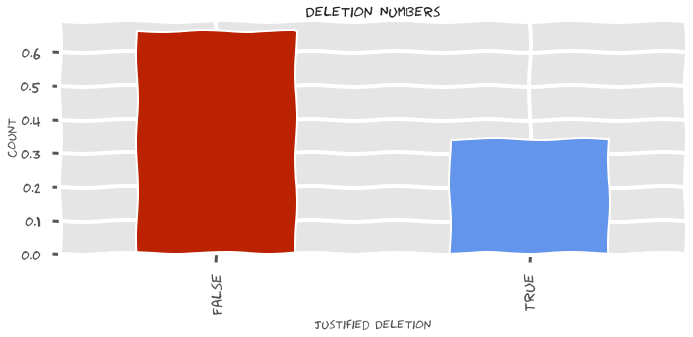

In [ ]:
with plt.xkcd():
    plt.style.use('ggplot')
    mycolors = ['#BB2201', '#6495ED']
    df_new['justified_deletion'].value_counts(normalize=True).plot(kind='bar', color=mycolors, figsize=(10,4))
    plt.title('Deletion Numbers')
    plt.xlabel('Justified Deletion')
    plt.ylabel('Count')
    plt.tick_params(labelsize=15)
    plt.show()

# **4 - EDA CONCLUSIONS**

## **4.1 - Analysis for a justified deletion column using "curse" flags - via tfidf visual**

In [ ]:
import altair as alt

In [ ]:
BOW_FOR_NOW = tfidf_df_stp2.sort_values(by=['pol_name','tfidf'], ascending=[True,False]).groupby(['pol_name']).head(500).word.values.tolist()

**Politician whose data vector appears darker implies that the deletion was motivated by specific content rather than aggressive phrases\lingual tokens (assuming that flags are mediated)**

* The code below was contributed by Eric Monson. Thanks, Eric!

In [ ]:
# Terms in this list will get a red dot in the visualization
term_list = term_list = [w for w in curses_lst if w in BOW_FOR_NOW]

# adding a little randomness to break ties in term ranking
top_50_tfidf_plusRand = tfidf_df_stp2_top_50.copy()
top_50_tfidf_plusRand['tfidf'] = top_50_tfidf_plusRand['tfidf'] + np.random.rand(top_50_tfidf_plusRand.shape[0])*0.0001

# base for all visualizations, with rank calculation
base = alt.Chart(top_50_tfidf_plusRand).encode(
    x = 'rank:O',
    y = 'pol_name:N'
).transform_window(
    rank = "rank()",
    sort = [alt.SortField("tfidf", order="descending")],
    groupby = ["pol_name"],
)

# heatmap specification
heatmap = base.mark_rect().encode(
    color = 'tfidf:Q'
)

# red circle over terms in above list
circle = base.mark_circle(size=100).encode(
    color = alt.condition(
        alt.FieldOneOfPredicate(field='word', oneOf=term_list),
        alt.value('red'),
        alt.value('#FFFFFF00')        
    )
)

# text labels, white for darker heatmap colors
text = base.mark_text(baseline='middle').encode(
    text = 'word:N',
    color = alt.condition(alt.datum.tfidf >= 0.23, alt.value('white'), alt.value('black'))
)

# display the three superimposed visualizations
(heatmap + circle + text).properties(width = 1700)

alt.LayerChart(...)

In [ ]:
# build a dict of politician vector num of curses
pol_bag_of_curses = dict()
for name in df_new.Politician.unique():
    my_new_lst = tfidf_df_stp2_top_100[tfidf_df_stp2_top_100['pol_name'] == name].word.values.tolist()
    cntr = 0
    for wrd in my_new_lst:
      if wrd in curses_lst:
        cntr+=1
    pol_bag_of_curses[name] = cntr
    cntr = 0

# df from dict of politician vector num of curses
df_pol_bag_of_curses = pd.DataFrame.from_dict(pol_bag_of_curses, orient='index').reset_index().rename(columns={"index":"Politician", 0:'num_of_curses'})

In [ ]:
# find curse mean ans std ti infer on "hot" cases
df_pol_bag_of_curses.describe()

,num_of_curses
count,37.000000
mean,5.513514
std,2.631240
min,1.000000
25%,4.000000
50%,5.000000
75%,7.000000
max,11.000000


We can see a colored ranking vector of tf-idf values representing the tendency of a politician to delete comment containing those words.
We can infer of 4 interesting trends:
1.	A relatively blue vector with ~ 3 Flags
2.	A relatively blue vector with ~ 7 Flags
3.	A relatively green vector with ~ 3 Flags
4.	A relatively green vector with ~ 7 Flags


In [ ]:
df_pol_bag_of_curses

,Politician,num_of_curses
0,Merav Ben Ari,6
1,Yair Lapid,10
2,Gila Gamliel,4
3,Moshe Kahlon,6
4,Amir Peretz,1
...,...,...
32,Stav Shaffir,2
33,Ayelet Shaked,5
34,Avigdor Liberman,7
35,Ayman Odeh,3


<Figure size 921.6x633.6 with 0 Axes>

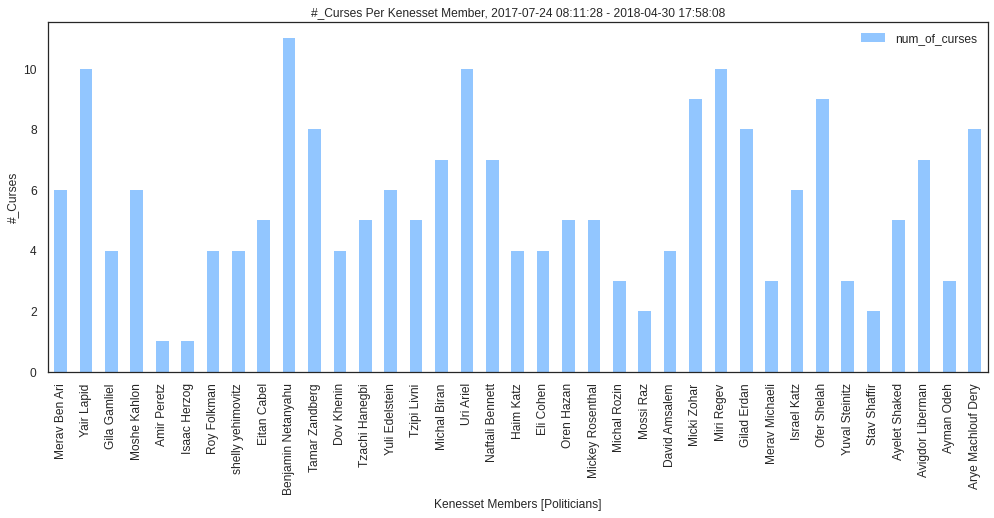

In [ ]:
plt.style.use('seaborn-white')
fig = plt.figure()
df_pol_bag_of_curses.plot.bar(x='Politician', y='num_of_curses', rot=90, fontsize=12 ,figsize=(15,6))
plt.ylabel('#_Curses', fontsize=12)
plt.xlabel('Kenesset Members [Politicians]', fontsize=12)
plt.title("#_Curses Per Kenesset Member, " + str(min(df['created_at'])) + " - " +
              str(max(df['created_at'])), fontsize=12)
plt.tick_params(labelsize=12)
plt.legend(fontsize=12)
plt.show()

## **4.2 - Justified Deletion Column Analysis PART 2 - Per Politician Measurement of Deletion Ratios**

In [ ]:
justification_ratio = df_new.groupby('Politician').message.count().to_frame().copy()
justification_ratio['justified_deletion'] = df_new.groupby('Politician').justified_deletion.sum()
justification_ratio['unjustified_deletion'] = justification_ratio.message - justification_ratio.justified_deletion
justification_ratio['Ratio'] = justification_ratio.justified_deletion / justification_ratio.unjustified_deletion
Del_justification_ratio = justification_ratio.sort_values(by='Ratio', ascending=False).reset_index().copy()

In [ ]:
# DEBUG
Del_justification_ratio

,Politician,message,justified_deletion,unjustified_deletion,Ratio
0,Avigdor Liberman,18,9,9,1.000000
1,Ofer Shelah,17,8,9,0.888889
2,Merav Ben Ari,32,15,17,0.882353
3,Arye Machlouf Dery,15,7,8,0.875000
4,Michal Rozin,43,19,24,0.791667
...,...,...,...,...,...
32,Mossi Raz,75,19,56,0.339286
33,Merav Michaeli,59,14,45,0.311111
34,Isaac Herzog,43,10,33,0.303030
35,Eitan Cabel,22,5,17,0.294118


### **4.2.1 - Justified Deletion Per Politician Ratio 🤡**

<Figure size 921.6x633.6 with 0 Axes>

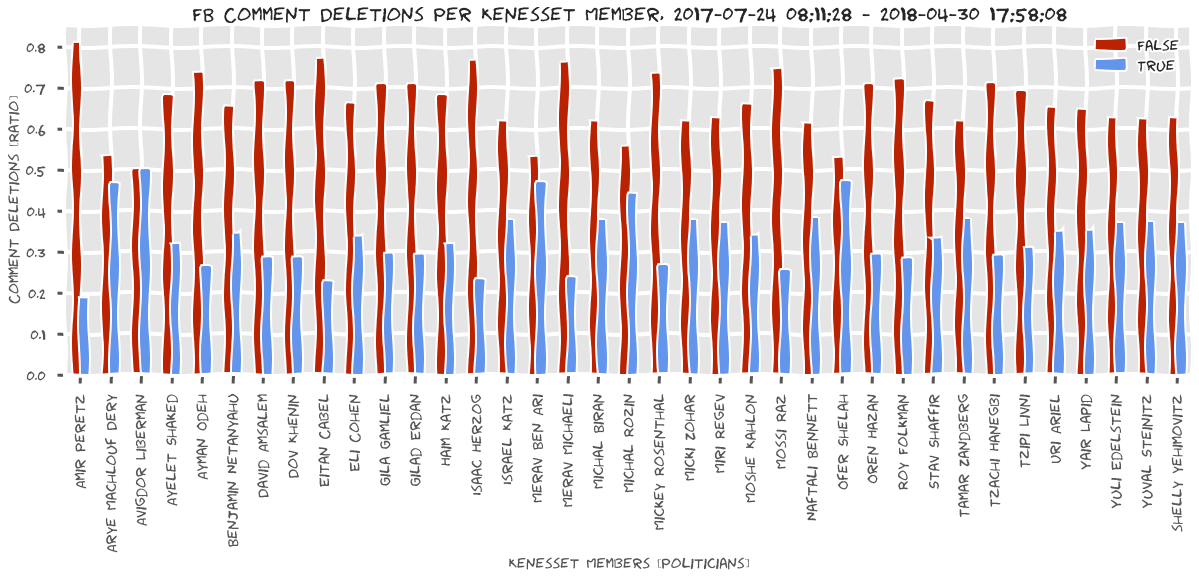

In [ ]:
with plt.xkcd():
    plt.style.use('ggplot')
    mycolors = ['#BB2201', '#6495ED']
    fig = plt.figure()

    df_new.groupby('Politician').justified_deletion.value_counts(normalize=True).unstack(-1).plot.bar(figsize=(18,6), color=mycolors)


    plt.ylabel('Comment Deletions [Ratio]', fontsize=15)
    plt.xlabel('Kenesset Members [Politicians]', fontsize=15)
    plt.title("FB Comment Deletions Per Kenesset Member, " + str(min(df['created_at'])) + " - " +
                  str(max(df['created_at'])), fontsize=20)
    plt.tick_params(labelsize=15)
    plt.legend(fontsize=15)
    plt.show()

### **4.2.1 - Justified Deletion Per Politician Ratio Ranking**

<Figure size 1080x576 with 0 Axes>

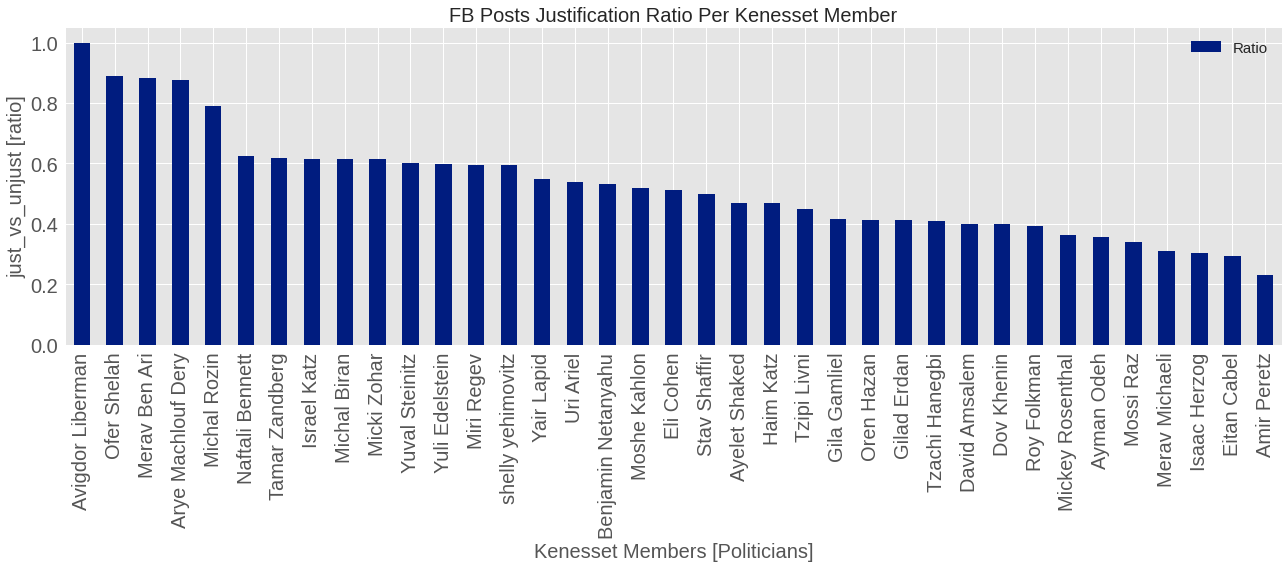

In [ ]:
plt.style.use('seaborn-dark-palette')
fig = plt.figure(figsize=(15, 8))
Del_justification_ratio.plot.bar(x='Politician', y='Ratio', rot=90, fontsize=20 ,figsize=(18,8))
plt.ylabel('just_vs_unjust [ratio]', fontsize=20)
plt.xlabel('Kenesset Members [Politicians]', fontsize=20)
plt.title("FB Posts Justification Ratio Per Kenesset Member", fontsize=20)
plt.legend(fontsize=15)
plt.tight_layout()
plt.show()

## **4.3 - Justified Deletion Column Analysis PART 3 - Right-Wing Deletions vs. Left-Wing Deletions**

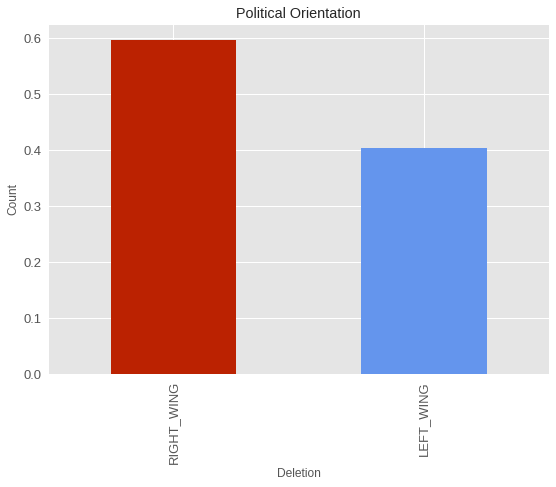

In [ ]:
# Right_Wing vs Left_Wing
plt.style.use('ggplot')
mycolors = ['#BB2201', '#6495ED']
fig = plt.figure()
ax = df_new['Wing'].value_counts(normalize=True).plot(kind='bar', color=mycolors, figsize=(8,6))
plt.title('Political Orientation')
plt.xlabel('Deletion')
plt.ylabel('Count')
plt.tick_params(labelsize=13)
plt.show()

Text(0, 0.5, 'Relative frequency')

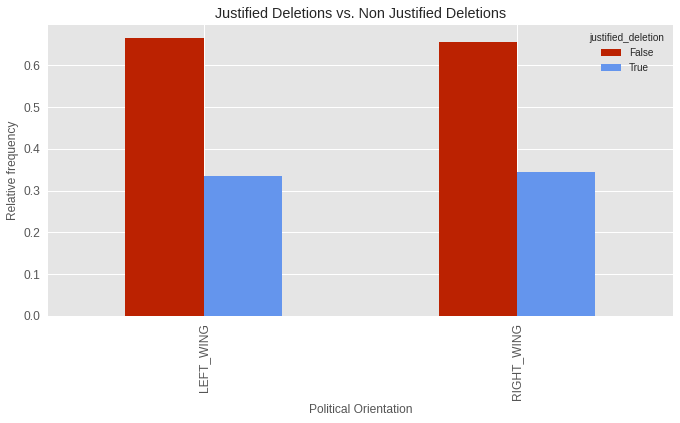

In [ ]:
### non_justified_deletion vs justified_deletion per pol_orientation (normalized)

mycolors = ['#BB2201', '#6495ED']
ct2 = pd.crosstab(df_new['Wing'], df_new['justified_deletion'], normalize='index')
ct2.plot(kind='bar', figsize=(10,5), color=mycolors)

plt.tick_params(axis='both', labelsize=12)
plt.title('Justified Deletions vs. Non Justified Deletions')
plt.xlabel('Political Orientation')
plt.ylabel('Relative frequency')

**table for pol_name with pol_orientation and msg data (total counts + T\F + norm')**

**Contingency Table - Cross Tabulation**

Left-Wing/Right-Wing justified Deletions

False - NON Justified Deletions

True - Justified Deletions

In [ ]:
# df[['pol_orient', 'justified_deletion']]
ct1 = pd.crosstab(df_new['Wing'], df_new['justified_deletion'])
ct1

justified_deletion,False,True
Wing,,
LEFT_WING,656,330
RIGHT_WING,955,502


In [ ]:
from scipy.stats import chi2_contingency as chi2

Chi-Square Test of Independence - for non_justified_deletion vs justified_deletion

H0 - political orientation and justified deletions are not correlated

H1 - political orientation and justified deletions are not uncorrelated (correlated)

In [ ]:
chi_2, p, dof, ex = chi2(ct1)
print(f'T Chi stat is: {chi_2}\nThe Pv is: {p}, with {dof} DoF\nThe H0 should not be rejected, and hance political orientation and justified deletions seems to be correlated')

T Chi stat is: 0.212456610113327
The Pv is: 0.6448487144032702, with 1 DoF
The H0 should not be rejected, and hance political orientation and justified deletions seems to be correlated


...

## **4.4 - Justified Deletion Column Analysis PART 4 - Deleted Comments Normalized By Followers**

In [ ]:
# DEBUG
likes_followers_df_excluded

,Politician,Wing,Deleted_Comments,Likes,Followers,Deletion_Followers_ratio
709216422557802,Jackie Levy,RIGHT_WING,7,9813.0,9976,0.000702
1390871357875195,Zouheir Bahloul,LEFT_WING,12,17650.0,17854,0.000672
374282785980513,Nurit Koren,RIGHT_WING,7,12033.0,12294,0.000569
620206311338749,Hilik Bar,LEFT_WING,10,29223.0,29361,0.000341
105820412921355,Yoel Hasson,LEFT_WING,6,NaN,21000,0.000286
...,...,...,...,...,...,...
455810997796182,Yossi Yonah,LEFT_WING,1,20399.0,20415,0.000049
404314496289809,Itzik Shmuli,LEFT_WING,4,112554.0,112913,0.000035
1578176972413229,Yoav Kisch,RIGHT_WING,1,37816.0,38972,0.000026
429184557235927,Bezalel Smotrich,RIGHT_WING,2,91669.0,104813,0.000019


In [ ]:
# DEBUG
likes_followers_df_kept

,Politician,Wing,Deleted_Comments,Likes,Followers,Deletion_Followers_ratio
632771873441351,Mossi Raz,LEFT_WING,77,27233.0,27965,0.002753
394242203948130,Uri Ariel,RIGHT_WING,40,20231.0,20306,0.001970
1618820118331461,Roy Folkman,RIGHT_WING,39,19765.0,20162,0.001934
371855757456,Yuli Edelstein,RIGHT_WING,115,NaN,71000,0.001620
977353718949028,Micki Zohar,RIGHT_WING,71,41120.0,44246,0.001605
...,...,...,...,...,...,...
396697410351933,Naftali Bennett,RIGHT_WING,78,514401.0,533460,0.000146
237683826350051,Ayelet Shaked,RIGHT_WING,25,227744.0,233912,0.000107
268108602075,Benjamin Netanyahu,RIGHT_WING,265,2622328.0,2703990,0.000098
178433145502975,Avigdor Liberman,RIGHT_WING,18,240438.0,246177,0.000073


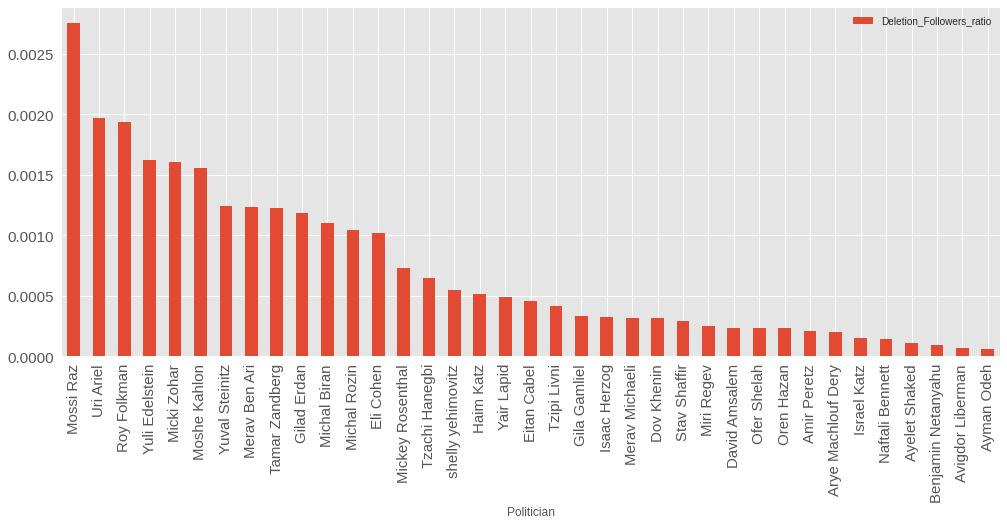

In [ ]:
# Kept Politicians - Comments deletions normalized by page followers

likes_followers_df_kept.plot.bar(x='Politician', y='Deletion_Followers_ratio', rot=90, fontsize=15 ,figsize=(15,6))

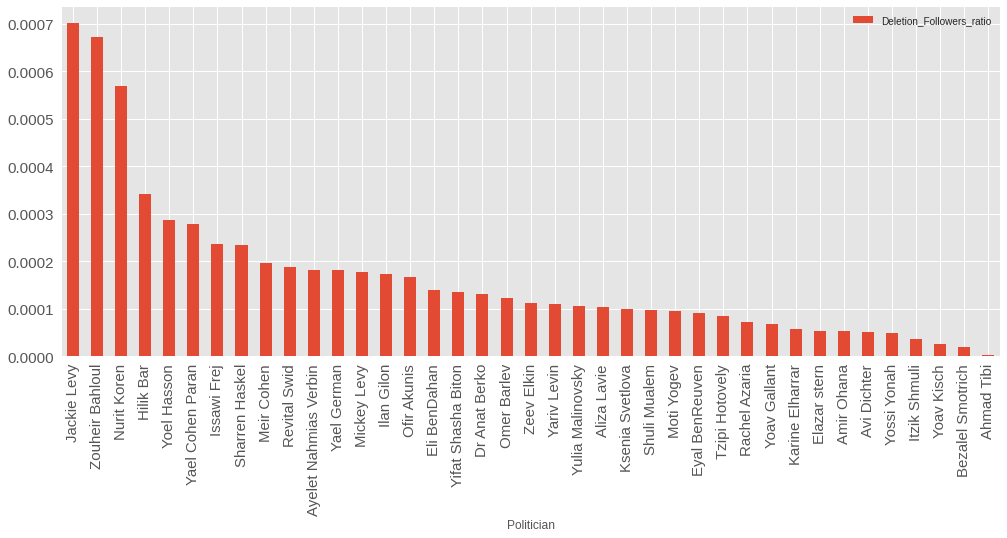

In [ ]:
# Excluded Politicians - Comments deletions normalized by page followers

likes_followers_df_excluded.plot.bar(x='Politician', y='Deletion_Followers_ratio', rot=90, fontsize=15 ,figsize=(15,6))

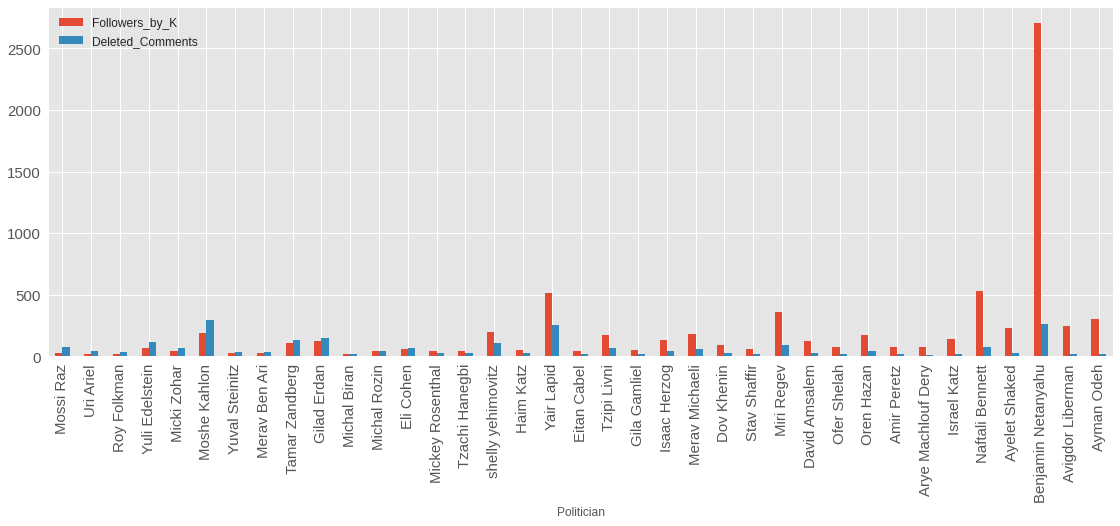

In [ ]:
likes_followers_df_kept['Followers_by_K'] = likes_followers_df_kept['Followers'] / 1000
ax = likes_followers_df_kept.plot.bar(x='Politician', y=['Followers_by_K', 'Deleted_Comments'], rot=90, fontsize=15 ,figsize=(17,6))
ax.legend(fontsize=12)
plt.show()

In [ ]:
correlation = likes_followers_df['Followers'].corr(likes_followers_df['Deleted_Comments'])
print(correlation)

0.5787924908059372
